In [1]:
from vikor_v_analysis import VikorVAnalysis
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import rankdata
import numpy as np

Let's start by computing all data for the experiment, then we'll have all descriptions.

In [2]:
experiment = VikorVAnalysis('wind_farms_data.csv')
experiment.run_experiment_v()
experiment.run_experiment_weights()
experiment.run_experiment_ahp()
experiment.run_experiment_criteria_elimination(
        experiment.data.drop(columns=['S16', 'S17', 'F28', 'F29', 'F30']),
        experiment.impacts.drop(index=['S16', 'S17', 'F28', 'F29', 'F30']),
        ahp_weights=np.array([
            0.041/6, 0.041/6, 0.041/6, 0.041/6, 0.041/6, 0.041/6,
            0.176/3, 0.176/3, 0.176/3,
            0.465/6, 0.465/6, 0.465/6, 0.465/6, 0.465/6, 0.465/6, # updated from 8
            0.318/10, 0.318/10, 0.318/10, 0.318/10, 0.318/10, 0.318/10, 0.318/10, 0.318/10, 0.318/10, 0.318/10,
            # financial costs removed completely
        ])
    )

# Towards Robust Sustainable Solutions Using VIKOR

## Results

### Dataset and Baseline

In the empirical study, a set of 7 potential offshore wind farm locations were investigated.

> TUTAJ OPIS TYCH LOKALIZACJI na podstawie EXCELA.

The locations were evaluated based on 30 criteria, which can be clustered into five groups: Location (L1-L6), Market (M7-M9), Social Benefits (S10-S17), Economic Benefits (E18-E27) and Financial Costs (F28-F30). The detailed description of the criteria is presented in **TUTAJ**. 

The criterial performance of each location is presented in the table below. The values are presented in their original units and are not normalized.

In [3]:
experiment.data

,L1,L2,L3,L4,L5,L6,M7,M8,M9,S10,...,E21,E22,E23,E24,E25,E26,E27,F28,F29,F30
A1,720,122,37.0,60.0,32.0,41,4,5.901639,2882390.40,1.455826e+06,...,16.560,89.124786,1782.495720,150.441696,0,3,0,8912.478600,300.883392,159.840
A2,720,119,22.0,65.0,32.0,39,3,6.050420,2882390.40,1.455826e+06,...,16.560,89.124786,1782.495720,150.441696,0,3,0,8912.478600,300.883392,159.840
A3,1498,190,40.0,-40.0,35.0,50,4,7.884211,5996973.36,3.028927e+06,...,34.454,185.429069,3708.581373,313.002306,0,2,2,18542.906870,626.004613,332.556
A4,1045,130,25.0,-25.0,45.0,60,3,8.038462,4183469.40,2.112970e+06,...,24.035,129.354724,2587.094483,218.349406,0,2,2,12935.472410,436.698812,231.990
A5,350,41,50.0,-50.0,42.0,42,3,8.536585,1401162.00,7.076933e+05,...,8.050,43.324549,866.490975,73.131380,0,1,0,4332.454875,146.262760,77.700
A6,1140,131,22.5,35.0,39.0,45,3,8.702290,4563784.80,2.305058e+06,...,26.220,141.114245,2822.284890,238.199352,1,2,2,14111.424450,476.398704,253.080
A7,400,91,23.0,28.5,46.5,60,4,4.395604,1601328.00,8.087924e+05,...,9.200,49.513770,990.275400,83.578720,0,1,0,4951.377000,167.157440,88.800


The cost/benefit impact of each criterion is presented here:

In [4]:
experiment.impacts

L1     1.0
L2     1.0
L3    -1.0
L4    -1.0
L5    -1.0
L6    -1.0
M7    -1.0
M8     1.0
M9     1.0
S10    1.0
S11    1.0
S12    1.0
S13    1.0
S14    1.0
S15    1.0
S16    1.0
S17    1.0
E18    1.0
E19    1.0
E20    1.0
E21    1.0
E22    1.0
E23    1.0
E24    1.0
E25    1.0
E26    1.0
E27    1.0
F28   -1.0
F29   -1.0
F30   -1.0
Name: Type (profit/cost), dtype: float64

Before proceeding with any robustness experiments, a baseline ranking of the locations should be established. In order to produce a ranking using the VIKOR method, each criterion needs to be assigned the preference weight. The weights can be obtained using expert judgment, however, in order to ascertain objectivity of the research, in this study a set of 4 objective weighting methods was used: equal weights, CRITIC, Entropy Weighting and Gini. The weights are presented **TUTAJ** and are charted **TUTAJ**.

In [5]:
pd.DataFrame(experiment.v_weights_scenarios, index=experiment.data.columns)

,eq,crit,ent,gini
L1,0.033333,0.017860,0.020578,0.026280
L2,0.033333,0.016923,0.013351,0.019198
L3,0.033333,0.058060,0.009810,0.017816
L4,0.033333,0.063396,-0.001759,0.242031
L5,0.033333,0.068597,0.001980,0.008285
L6,0.033333,0.054253,0.002723,0.009510
M7,0.033333,0.068469,0.001994,0.007351
M8,0.033333,0.036517,0.004656,0.011984
M9,0.033333,0.017860,0.020578,0.026280
S10,0.033333,0.017860,0.020578,0.026280


<Figure size 640x480 with 0 Axes>

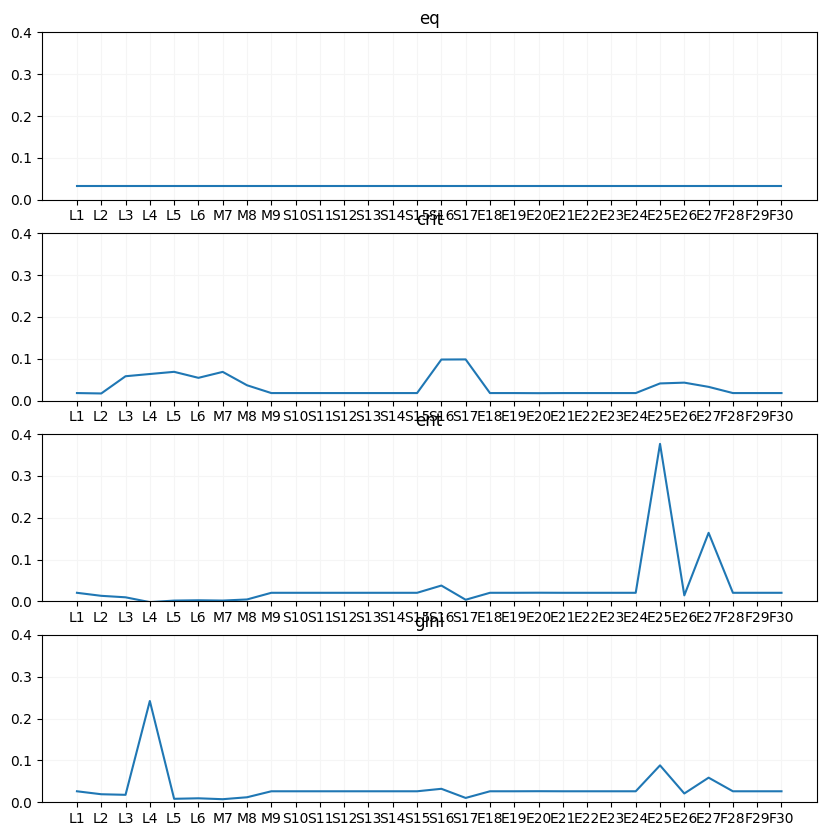

In [6]:
experiment.draw_v_weights_plots(None, ylim=[0,0.4])
plt.show()

The `v` parameter in VIKOR method allows to choose between multiple approaches to obtain the final ranking. If the value is 1, then the strategy of maximum group utility is used, therefore the solution closest to ideal solution is ranked best. However, if value is 0, then the veto strategy is used. This means that the solution with worst value of the worst criterion is penalized in the ranking. Any value between 0 and 1, allows to balance between these two strategies. In case of value 0.5, a consensus between best group utility value and vetoing worst cases is achieved.

In many research papers the value of `v` is set to `0.5` [**dodac referencje**], and this is the value which we will use in this study for benchmarking. 

The `Qi` scores for four rankings obtained in such manner are presented **TUTAJ**.

In [7]:
comparisons_v = [
    experiment.comparisons_v['eq'].to_dataframe(),
    experiment.comparisons_v['crit'].to_dataframe(),
    experiment.comparisons_v['ent'].to_dataframe(),
    experiment.comparisons_v['gini'].to_dataframe(),
]
comparisons_v_df = pd.concat(comparisons_v)
comparisons_v_05 = comparisons_v_df[comparisons_v_df['evaluator'] == 'v_0.5']
comparisons_v_05 = comparisons_v_05.drop(columns=['evaluator', 'decision_problem'])
comparisons_v_05.set_index('weights_set', inplace=True)
comparisons_v_05

,A1,A2,A3,A4,A5,A6,A7
weights_set,,,,,,,
eq,0.273180,0.220163,0.016667,0.179978,0.416958,0.084777,0.516667
crit,0.252917,0.066330,0.628333,0.715227,0.208906,0.590595,1.000000
ent,0.919145,0.914076,0.715818,0.785671,1.000000,0.000000,0.991000
gini,0.890648,0.918167,0.000000,0.153104,0.336836,0.446148,0.750297


In [8]:
comparisons_v_05_ranks = pd.DataFrame(rankdata(comparisons_v_05, axis=1, method='min'), index=comparisons_v_05.index, columns=comparisons_v_05.columns)
comparisons_v_05_ranks

,A1,A2,A3,A4,A5,A6,A7
weights_set,,,,,,,
eq,5,4,1,3,6,2,7
crit,3,1,5,6,2,4,7
ent,5,4,2,3,7,1,6
gini,6,7,1,2,3,4,5


For ease of comparison, the `Qi` scores can be visualized in a bar chart **TUTAJ**. Note that the Y axis is inverted, so the higher the bar, the better the ranking.

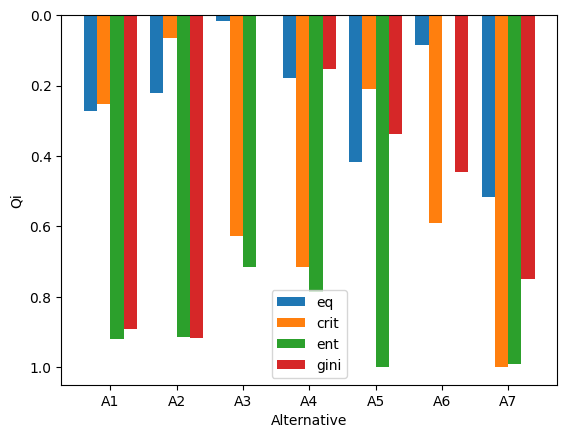

In [9]:
x_num = np.arange(len(comparisons_v_05.columns))
bar_width = 1 / (comparisons_v_05.index.size + 1)

fig, ax = plt.subplots()
i = 0
for index, row in comparisons_v_05.iterrows():
    ax.bar(x_num + (bar_width * i), row, label=index, width=bar_width)
    i += 1

ax.set_xlabel('Alternative')
ax.set_ylabel('Qi')
ax.legend()
ax.set_xticks(x_num + bar_width * (i - 1) / 2)
ax.set_xticklabels(comparisons_v_05.columns)
fig.gca().invert_yaxis()
plt.show()

During the comparative analysis of the obtained baseline rankings, the correlation matrix presented **TUTAJ** might also be helpful.

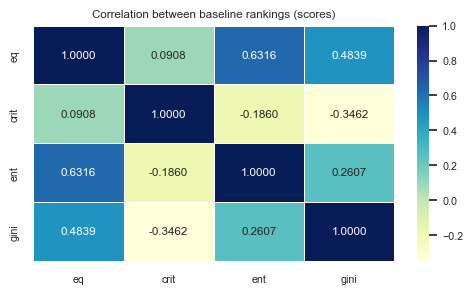

In [30]:
from comparator.utils import plot_correlations_heatmap
plot_correlations_heatmap(comparisons_v_05.T.corr(), figure_size=(5,3), title="Correlation between baseline rankings (scores)", x_label=None, y_label=None)
plt.savefig('var/baseline_correlation_eq_crit_ent_gini_scores.png')


And for ranks:

In [11]:
# plot_correlations_heatmap(comparisons_v_05_ranks.T.corr(), figure_size=(5,3), title="Correlation between baseline rankings (ranks)", x_label=None, y_label=None)
# plt.savefig('var/baseline_correlation_eq_crit_ent_gini_ranks.png')

The analysis of the aforementioned tables and charts allows to observe that each ranking indicates different alternative as the best one. However, based on the correlation matrices, the results produced by equal-weights  and entropy-weights are most correlated to each other. Gini is also quite similar to these two, but CRITIC is the most different. CRITIC is not correlated to the EQ and ENT rankings, and there is notifiable negative correlation between CRITIC and Gini.

### Maximum Group Utility vs Consensus vs Veto Robustness


The rankings presented in section **BASELINES** were produced using a fixed `v=0.5` value. In the first robustness experiment, the value of `v` varied between 0 and 1 in `0.2` steps in order to observe how the rankings change. The results of such sensitivity analysis are presented on the charts **TUTAJ**.  

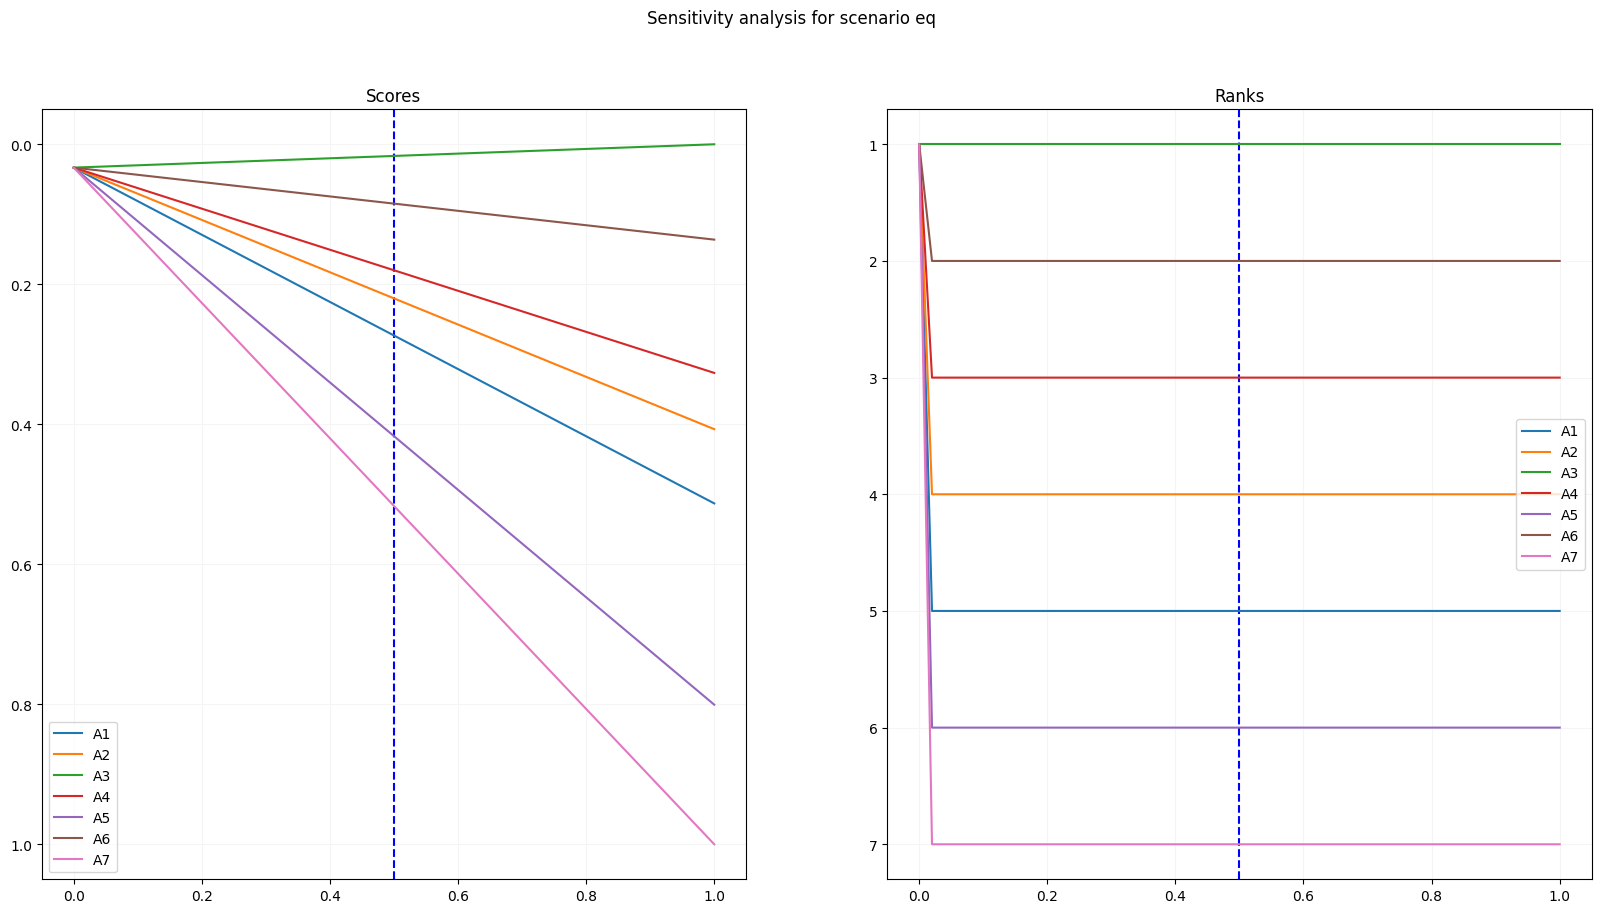

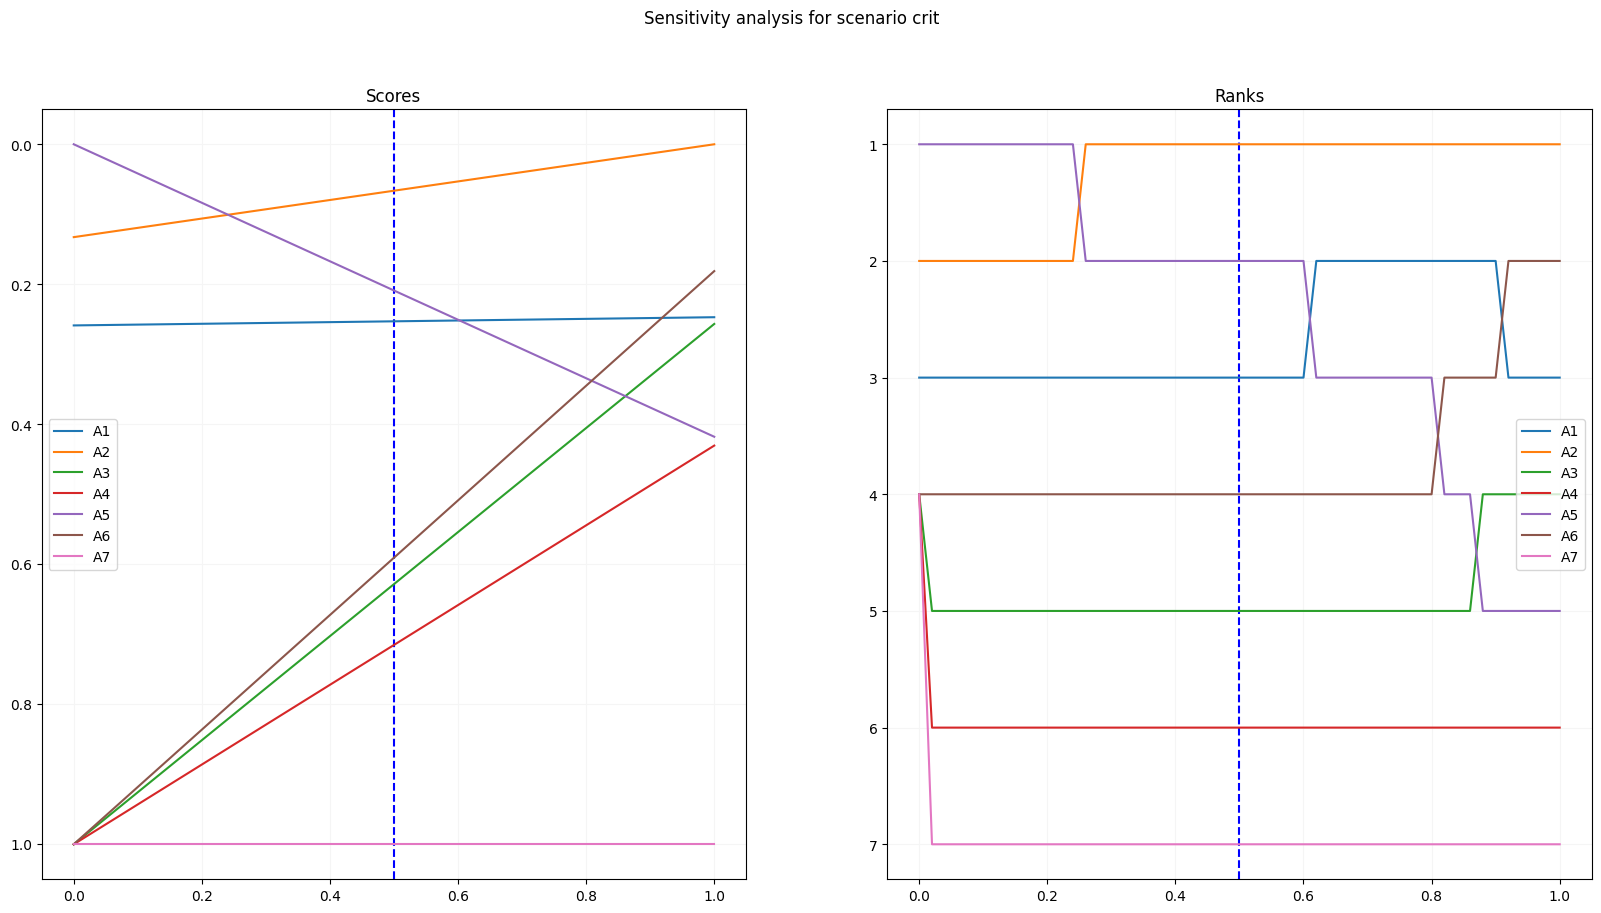

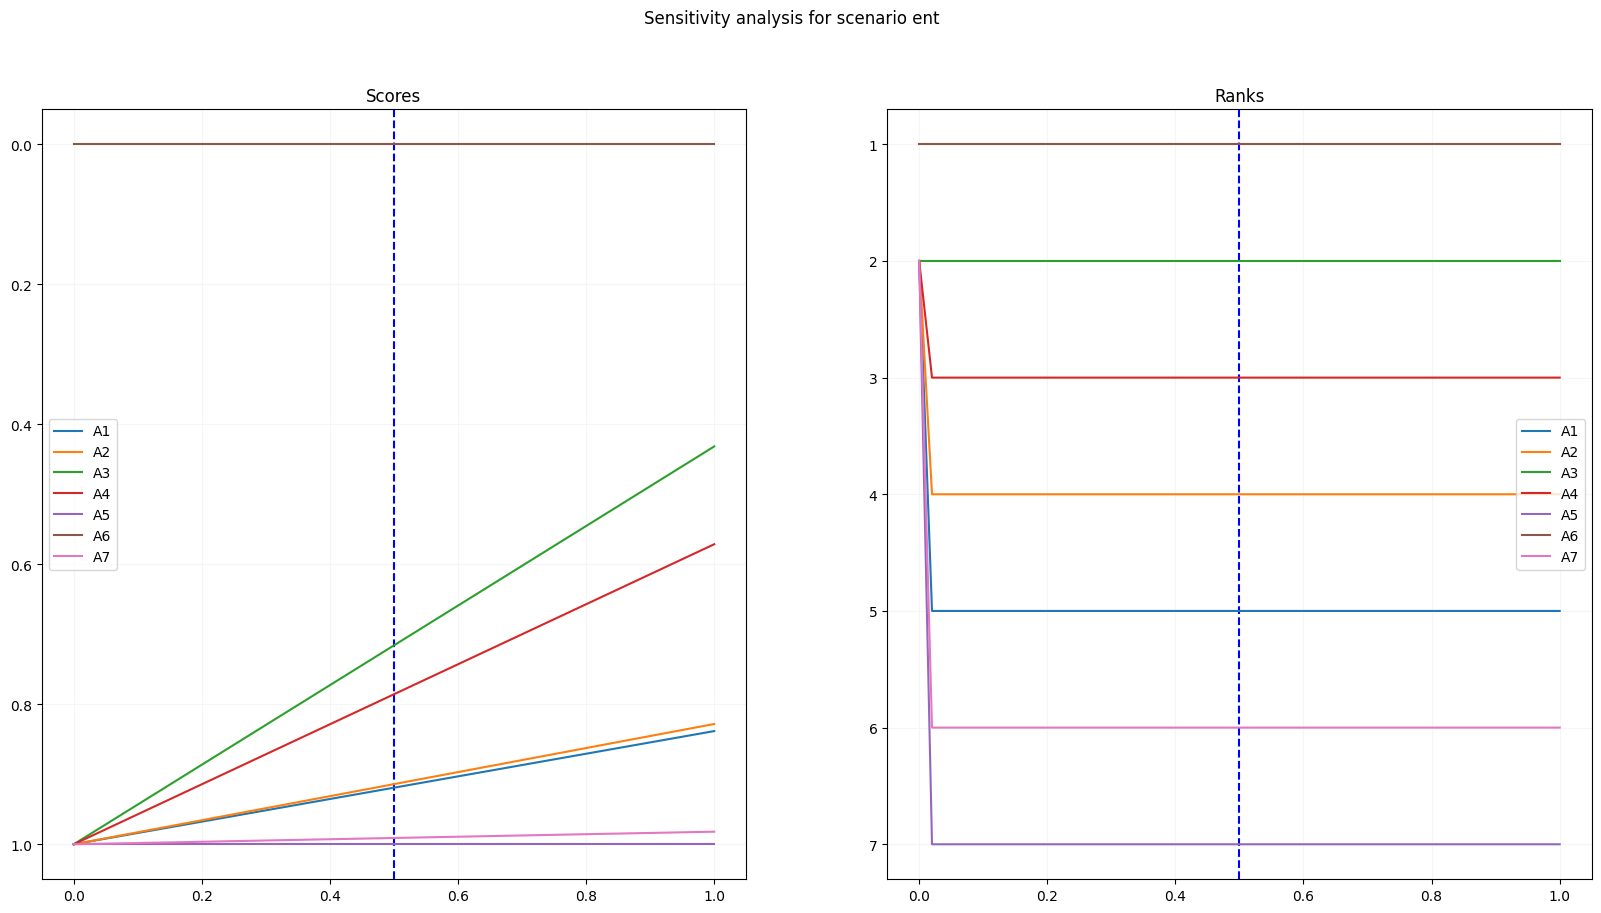

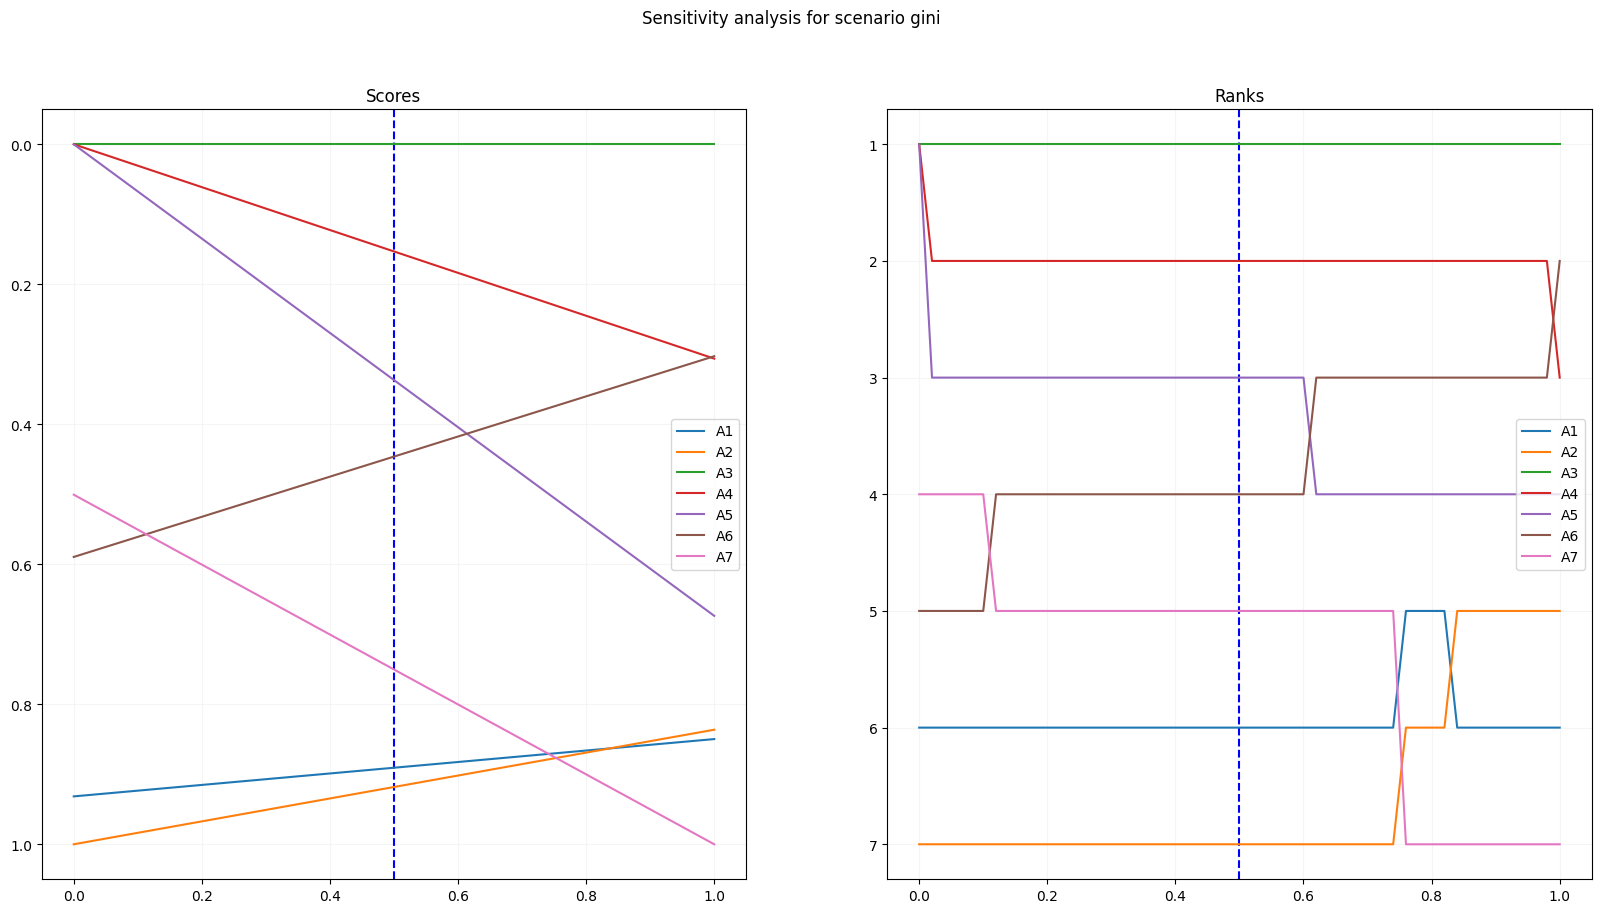

In [12]:
experiment.sensitivity_analysis_v(path_template=None)

For each of the studied weights scenarios, two charts are available: sensitivity analysis for `Qi` values and for ranks. The blue dashed line on each chart represents the scores and ranks for the baseline scenario with `v=0.5`. Note, that the Y axis is inverted on the charts, so the best alternative is always plotted highest.

#### EQ scenario

The ranking obtained with the equal-weights scenario is very stable. Regardless of the value of `v`, the alternatives' ranks remain unchanged, unless the value is reduced to `0.0`. Then every alternative has the same score of 0.0333, so the solution is inconclusive. This is caused by **tutaj Jarek podpowie z tych metryk dlaczego; wyłaczamy jedna z R S i wychodzi jak wychodzi**.

In [13]:
tempdf = experiment.comparisons_v['eq'].to_dataframe()
tempdf[tempdf['evaluator'] == 'v_0.0']

,decision_problem,weights_set,evaluator,A1,A2,A3,A4,A5,A6,A7
0,wfarms,eq,v_0.0,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333


#### ENT scenario

The ranking obtained with the weights generated objectively using entropy weighting method is also very stable. Alternative A6 is always indicated as the best one, and A5 as the worst one. Again, this changes exclusively in the `v=0.0` scenario, but this time the alternative A6 remains indicated as the best one, yet the others are scored exactly 1.0000.

In [14]:
tempdf = experiment.comparisons_v['ent'].to_dataframe()
tempdf

,decision_problem,weights_set,evaluator,A1,A2,A3,A4,A5,A6,A7
0,wfarms,ent,v_0.0,1.000000,1.000000,1.000000,1.000000,1.0,0.0,1.00000
1,wfarms,ent,v_0.02,0.996766,0.996563,0.988633,0.991427,1.0,0.0,0.99964
2,wfarms,ent,v_0.04,0.993532,0.993126,0.977265,0.982854,1.0,0.0,0.99928
3,wfarms,ent,v_0.06,0.990297,0.989689,0.965898,0.974280,1.0,0.0,0.99892
4,wfarms,ent,v_0.08,0.987063,0.986252,0.954531,0.965707,1.0,0.0,0.99856
5,wfarms,ent,v_0.1,0.983829,0.982815,0.943164,0.957134,1.0,0.0,0.99820
6,wfarms,ent,v_0.12,0.980595,0.979378,0.931796,0.948561,1.0,0.0,0.99784
7,wfarms,ent,v_0.14,0.977360,0.975941,0.920429,0.939988,1.0,0.0,0.99748
8,wfarms,ent,v_0.16,0.974126,0.972504,0.909062,0.931415,1.0,0.0,0.99712
9,wfarms,ent,v_0.18,0.970892,0.969067,0.897694,0.922841,1.0,0.0,0.99676


#### Gini scenario

While the charts produced by sensitivity analysis for EQ and ENT scenarios were quite similar and very stable, the outcome of Gini scenario sensitivity analysis is quite different. From the first glimpse, it is clearly visible that the obtained solution is more compromise than the previous ones. Depending on the value of `v`, the scores of each alternative change with different direction and speed. Whilst the alternative A3 remains the best regardless of the `v` value, if `v` is increased to change the VIKOR methods balance towards veto, alternatives A4, A5, A6 get worse resuls (higher Qi values) and alternatives A6, A1 and A2 get better results (lower Qi values).

On the other hand, if the `v` values is set to 0, the `Qi` score of alternatives A3, A4 and A5 becomes 0, suggesting they are representing the hightest group utility. Alternative A2 is penalized the most, with the score of 1.000.  

In [15]:
tempdf = experiment.comparisons_v['gini'].to_dataframe()
tempdf

,decision_problem,weights_set,evaluator,A1,A2,A3,A4,A5,A6,A7
0,wfarms,gini,v_0.0,0.931588,1.000000,0.0,0.000000,0.000000,0.589529,0.500594
1,wfarms,gini,v_0.02,0.929951,0.996727,0.0,0.006124,0.013473,0.583794,0.510582
2,wfarms,gini,v_0.04,0.928313,0.993453,0.0,0.012248,0.026947,0.578059,0.520570
3,wfarms,gini,v_0.06,0.926675,0.990180,0.0,0.018372,0.040420,0.572323,0.530558
4,wfarms,gini,v_0.08,0.925038,0.986907,0.0,0.024497,0.053894,0.566588,0.540546
5,wfarms,gini,v_0.1,0.923400,0.983633,0.0,0.030621,0.067367,0.560853,0.550534
6,wfarms,gini,v_0.12,0.921763,0.980360,0.0,0.036745,0.080841,0.555118,0.560522
7,wfarms,gini,v_0.14,0.920125,0.977087,0.0,0.042869,0.094314,0.549382,0.570511
8,wfarms,gini,v_0.16,0.918487,0.973813,0.0,0.048993,0.107788,0.543647,0.580499
9,wfarms,gini,v_0.18,0.916850,0.970540,0.0,0.055117,0.121261,0.537912,0.590487


#### CRIT scenario

Last, but not lest, the CRITIC scenario. The charts on Fig. **TUTAJ** are visually similar to those of GINI. However, the results are quite different. Alternative A2, ranked quite low in the GINI scenario, here is indicated as the best one with a considerable stability interval of `v in approx [0.24, 1]`. Interestingly, Its winning position comes from the compromise approach of the VIKOR method. This can be confirmed experimentally by setting `v` to 0, i.e. disabling the "veto" component. In such case, the alternative A5 is ranked best, and alternative A2 is ranked second. As the value of the `v` parameter increases, the alternative A5 ranks lower as second (v=0.24), third (v=0.62), fourth (v=0.82) and fifth (v=0.88). Another interesting observation can be made about alternative A1. It is ranked third, quite stable throughout the scope of the sensitivity analysis with a constant score of around 0.247956 - 0.258778. This stable score regardless of v value, (**co to w ogole znaczy ze score mu sie nie zmienia?**), while the others, such as A5 and A6 change rapidly, leads to an interesting change in ranks. A1 is ranked 3rd for v in range 0-0.6 and then again from 0.92-1.0.

In [16]:
tempdf = experiment.comparisons_v['crit'].to_dataframe()
tempdf

,decision_problem,weights_set,evaluator,A1,A2,A3,A4,A5,A6,A7
0,wfarms,crit,v_0.0,0.258778,0.132660,1.000000,1.000000,0.000000,1.000000,1.0
1,wfarms,crit,v_0.02,0.258543,0.130007,0.985133,0.988609,0.008356,0.983624,1.0
2,wfarms,crit,v_0.04,0.258309,0.127353,0.970267,0.977218,0.016712,0.967248,1.0
3,wfarms,crit,v_0.06,0.258074,0.124700,0.955400,0.965827,0.025069,0.950871,1.0
4,wfarms,crit,v_0.08,0.257840,0.122047,0.940533,0.954436,0.033425,0.934495,1.0
5,wfarms,crit,v_0.1,0.257605,0.119394,0.925667,0.943045,0.041781,0.918119,1.0
6,wfarms,crit,v_0.12,0.257371,0.116741,0.910800,0.931654,0.050137,0.901743,1.0
7,wfarms,crit,v_0.14,0.257137,0.114087,0.895933,0.920264,0.058494,0.885367,1.0
8,wfarms,crit,v_0.16,0.256902,0.111434,0.881066,0.908873,0.066850,0.868990,1.0
9,wfarms,crit,v_0.18,0.256668,0.108781,0.866200,0.897482,0.075206,0.852614,1.0


### Weights Robustness (Criterion Importance Analysis ? )


In the second experiment, preference weights robustness was studied. In this experiment, all criteria were assigned equal weights (`1 / 30 = 0.0333`). Then, each criterion's weight was boosted to 10% (whilst the rest of criteria got decreased slightly, to `(1-0.1) / 29 = 0.031034`). In this experiment, a constant value of v=0.5 was used, to provide easy comparison with the baseline ranking in section **ABOVE**. 

A complete matrix of weights for all 31 scenarios is presented **TUTAJ**:

In [17]:
tempdf = pd.DataFrame(experiment.weights_scenarios_weights)
tempdf

,eq,L1,L2,L3,L4,L5,L6,M7,M8,M9,...,E21,E22,E23,E24,E25,E26,E27,F28,F29,F30
0,0.033333,0.100000,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,...,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034
1,0.033333,0.031034,0.100000,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,...,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034
2,0.033333,0.031034,0.031034,0.100000,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,...,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034
3,0.033333,0.031034,0.031034,0.031034,0.100000,0.031034,0.031034,0.031034,0.031034,0.031034,...,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034
4,0.033333,0.031034,0.031034,0.031034,0.031034,0.100000,0.031034,0.031034,0.031034,0.031034,...,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034
5,0.033333,0.031034,0.031034,0.031034,0.031034,0.031034,0.100000,0.031034,0.031034,0.031034,...,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034
6,0.033333,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.100000,0.031034,0.031034,...,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034
7,0.033333,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.100000,0.031034,...,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034
8,0.033333,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.100000,...,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034
9,0.033333,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,...,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034


These weights' scenarios can also be visually compared in the charts on Fig. **TUTAJ**: 

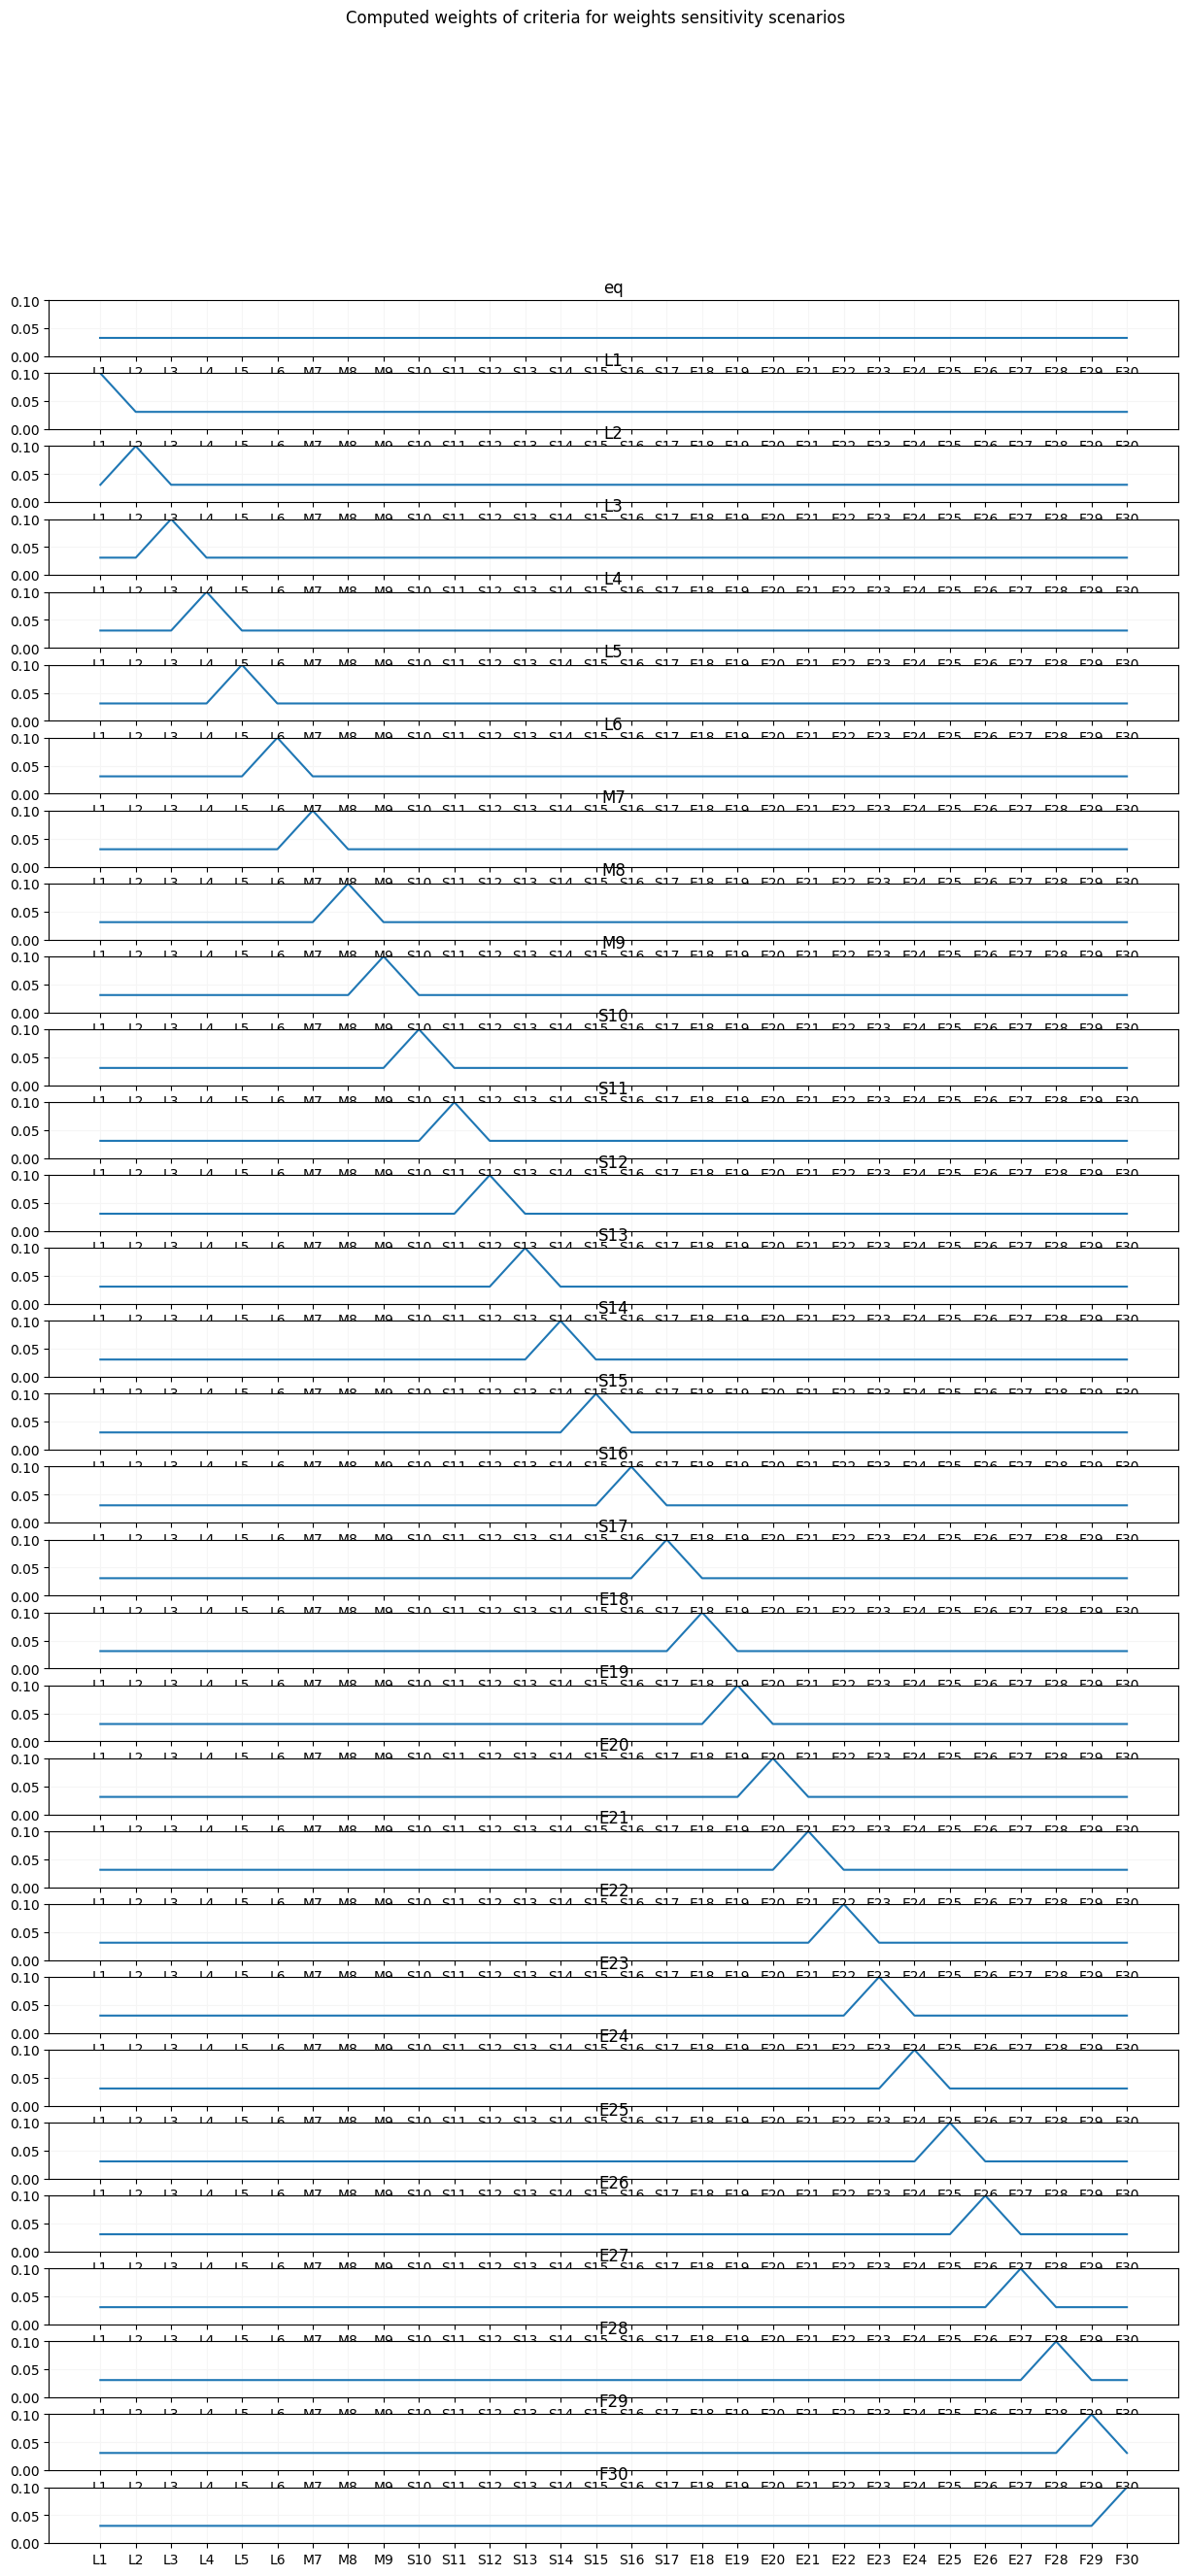

In [18]:
experiment.draw_weights_sensitivity_plots(path=None)
plt.show()

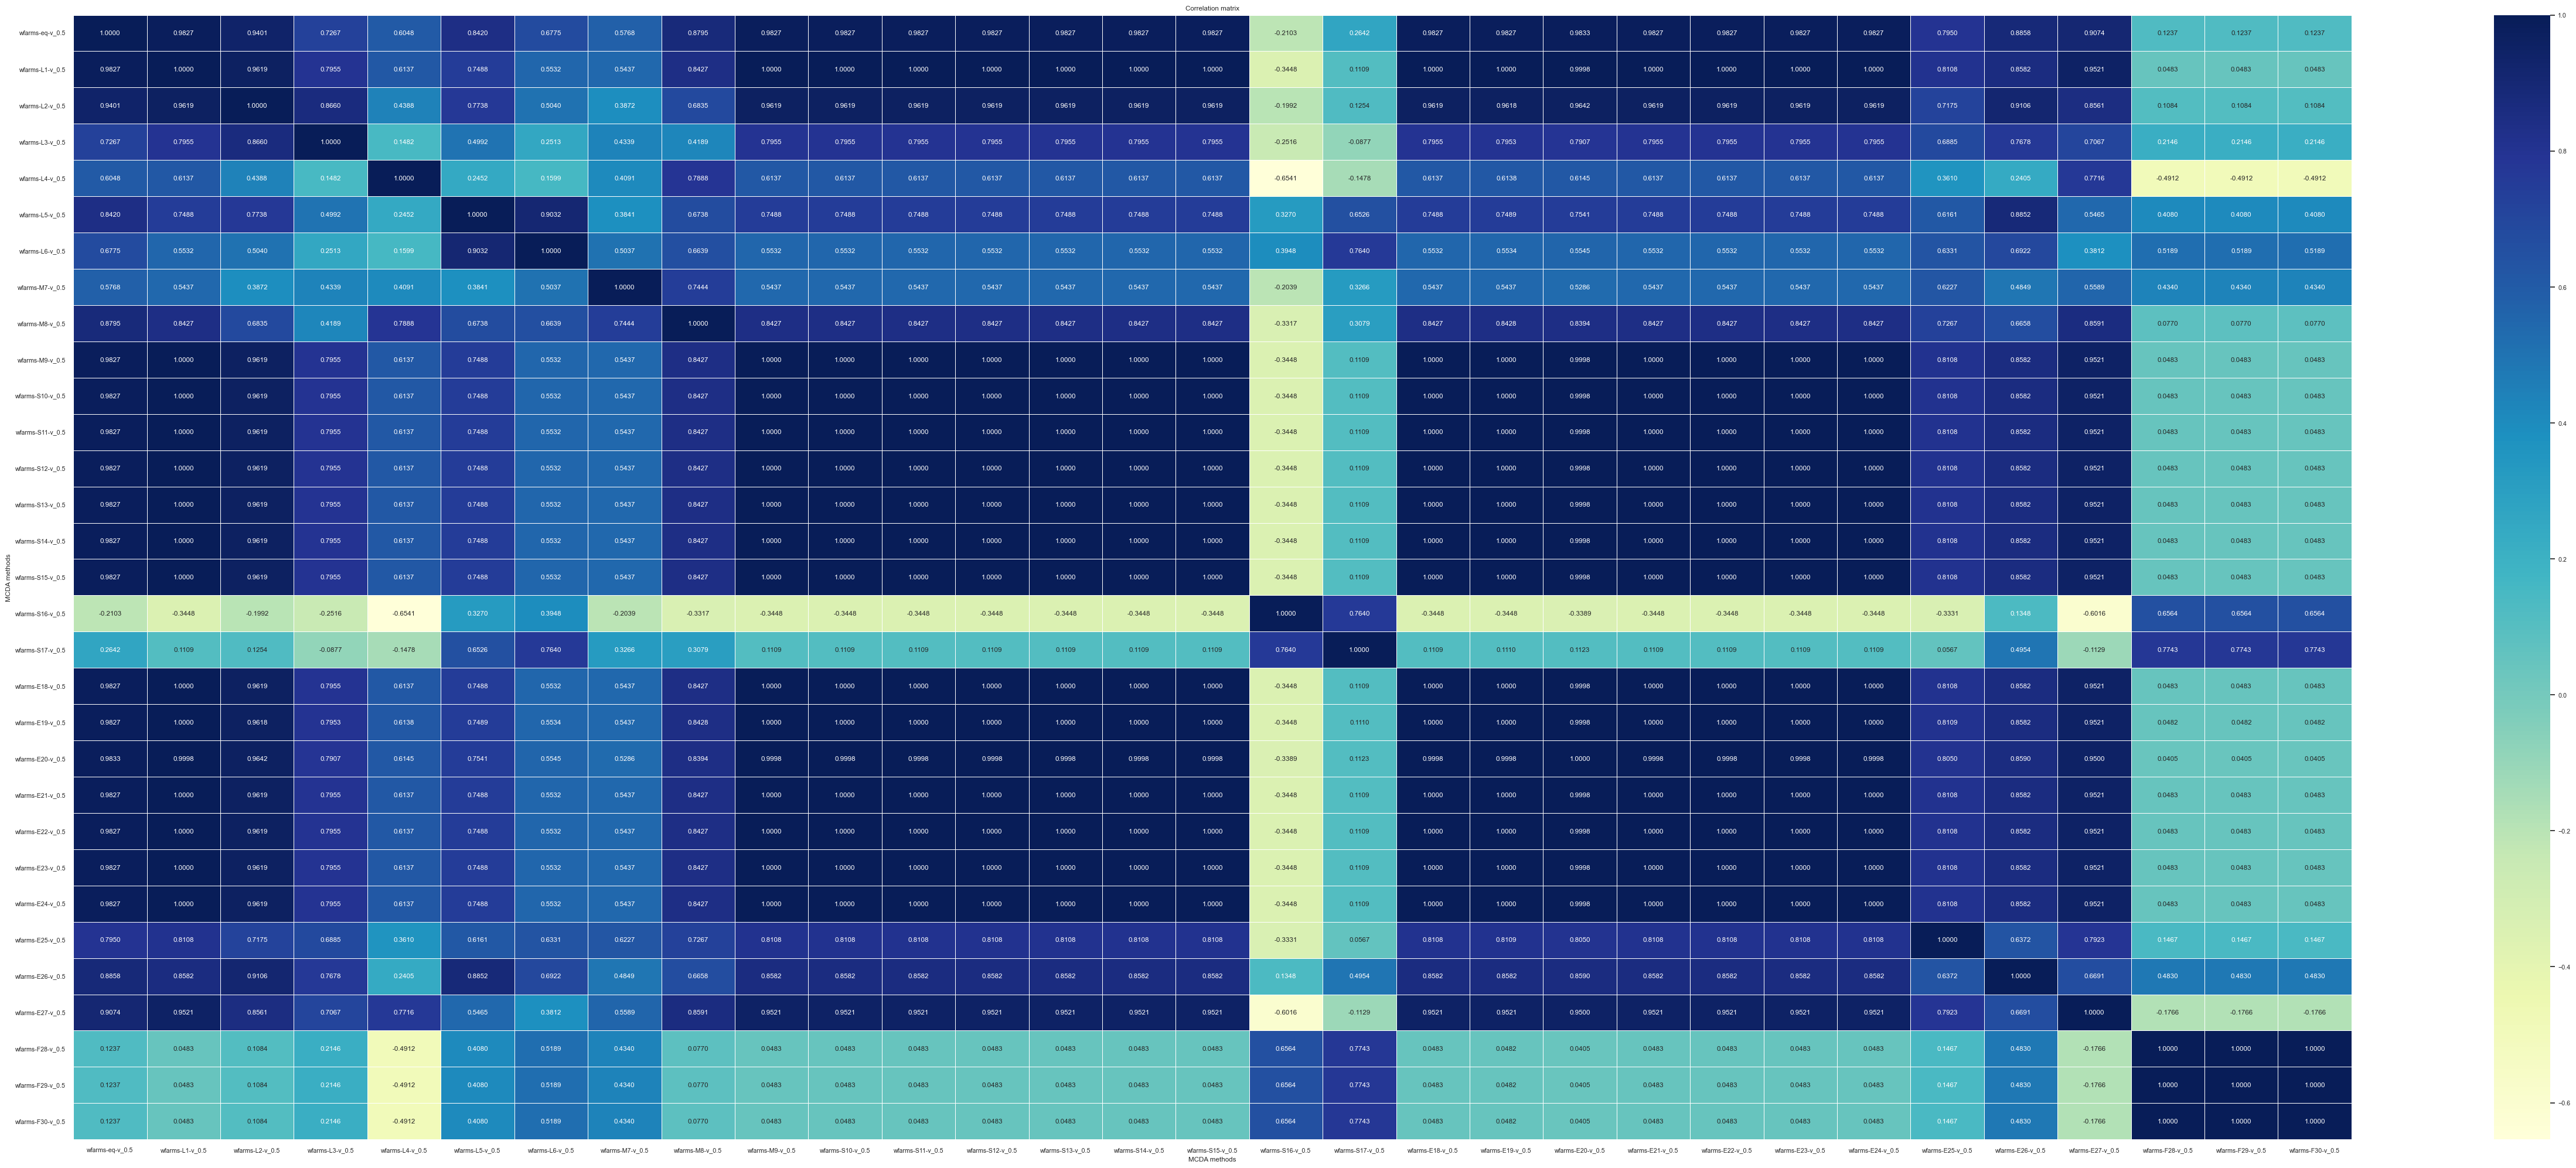

In [19]:
experiment.heatmap_weights_correlations()
plt.show()

The scores of each ranking are presented in Table **TUTAJ**:

In [20]:
experiment.comparison_w.to_dataframe()

,decision_problem,weights_set,evaluator,A1,A2,A3,A4,A5,A6,A7
0,wfarms,eq,v_0.5,0.273180,0.220163,0.016667,0.179978,0.416958,0.084777,0.516667
1,wfarms,L1,v_0.5,0.535014,0.488595,0.000000,0.229744,0.915535,0.081011,0.968423
2,wfarms,L2,v_0.5,0.370198,0.337905,0.000000,0.242815,0.931948,0.150850,0.756711
3,wfarms,L3,v_0.5,0.436597,0.171171,0.241071,0.135752,0.969166,0.023815,0.500000
4,wfarms,L4,v_0.5,0.763493,0.749278,0.000000,0.158934,0.361801,0.417962,0.769891
5,wfarms,L5,v_0.5,0.215712,0.168286,0.000000,0.616936,0.665175,0.204266,1.000000
6,wfarms,L6,v_0.5,0.209817,0.153695,0.154762,0.685565,0.347397,0.047085,1.000000
7,wfarms,M7,v_0.5,0.759496,0.133728,0.506125,0.094036,0.328113,0.000000,1.000000
8,wfarms,M8,v_0.5,0.505953,0.431295,0.000000,0.143388,0.347232,0.048192,1.000000
9,wfarms,M9,v_0.5,0.535014,0.488595,0.000000,0.229744,0.915535,0.081011,0.968423


Also, the results can be visualized on the plots on Fig. **TUTAJ**. The scores for the equal weights are always plotted as blue solid line, whereas the scores for the individual scenarios are scattered as dots. The Y axis is inverted, so the higher the bar, the better the ranking.

<Figure size 640x480 with 0 Axes>

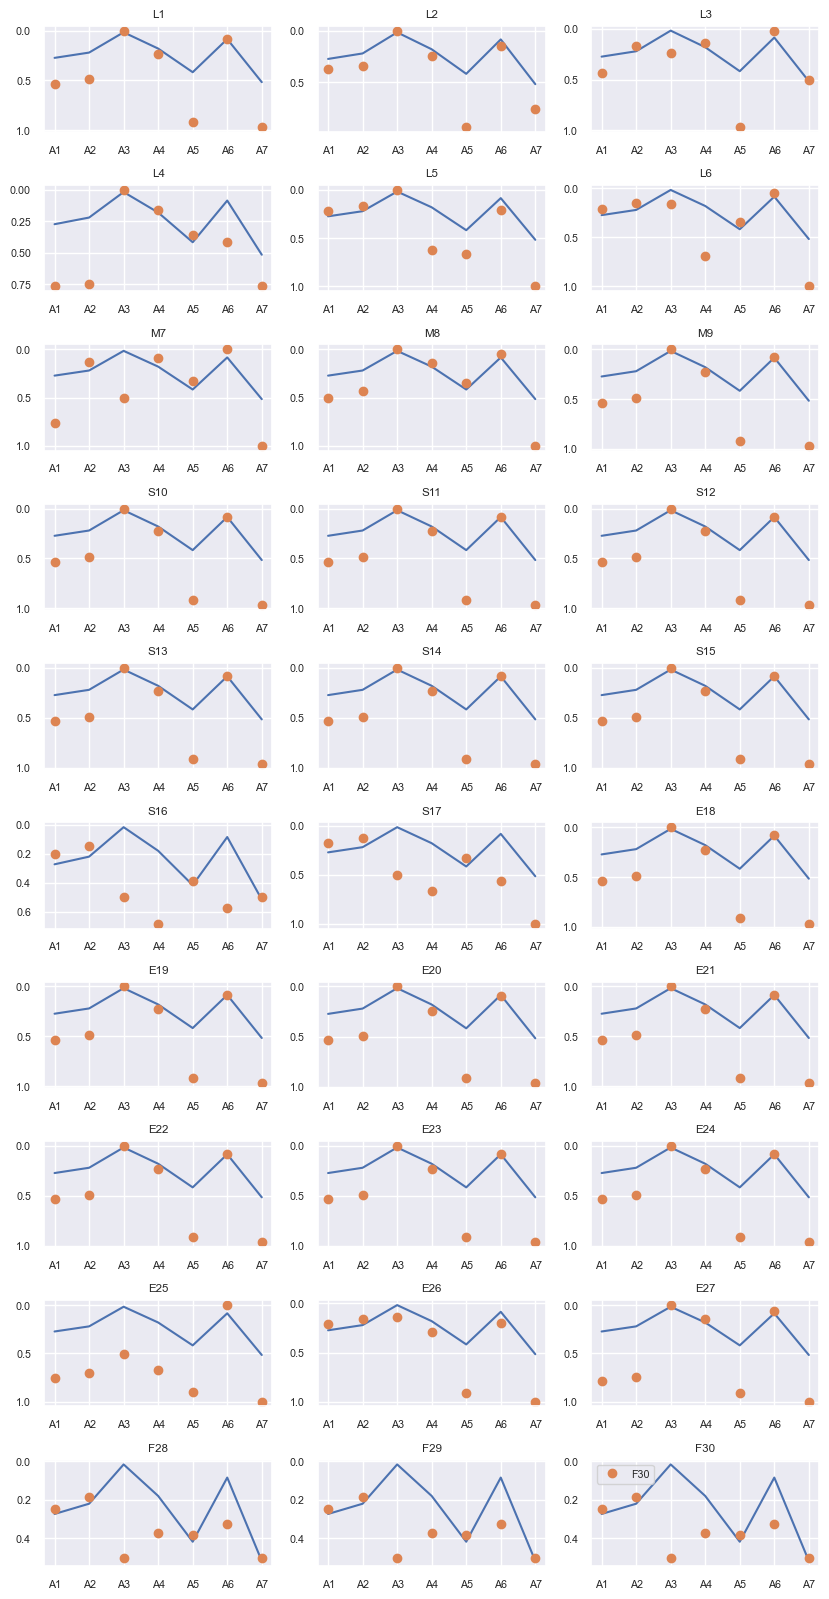

In [21]:
experiment.draw_weights_scores()

Majority of the scenarios produced highly correlated rankings. For example L1 & L2 have a correlation of 0.9619 (respectively correlated 0.9827 and 0.9401 to the equal weights' scenario). This can be visually confirmed on the charts, where for example A1 and A2 are scored slightly better for scenario L2, but still not enough to have better rank than A4. The only actual difference is between A5 and A7, which switch on the last 2 spots in the ranking.

On the other hand, a huge area of low correlation can be observed for scenarios S16-S17 and F28-F30. They seem to be uncorrelated to majority of other scenarios, except themselves. Whilst it could be expected for the F28-F30 scenarios, as these criteria form a complete financial cost cluster, which can be expected to be in conflict to other criteria, in case of S16-S17 criteria, they are only a part of a bigger Social cluster S10-S17. Let's investigate the results. For S16 and S17 scenarios, alternatives A2 and A1 are scored better than for other cases, whereas A4 which usually ranked quite high, for S16 and A17 scenarios is ranked last or second to last. Similar observation regarding alternatives A2 and A1 can be made regarding the F28-F30 scenarios. These facts indicate that alternatives A2 and A1 are highly supported by the Financial and part of the Social criteria, but not by the rest of the criteria. This can be confirmed by the fact that the S16-S17 and F28-F30 scenarios are highly correlated to each other, but not to the rest of the scenarios.

### Cluster Robustness (Expert Judgment Application ? )

The aforementioned fact that Financial cluster and part of the Social cluster of criteria supported different alternatives that the rest of the criteria leads to the third experiment, in which the weights of individual criteria will be set using expert judgment. An expert was given a task to perform pairwise comparison of all 5 clusters of criteria. Using the AHP method, scores of all clusters were computed. The score of each cluster was then equally divided between all criteria within that cluster. The obtained final weights are presented **TUTAJ**:

In [22]:
pd.DataFrame(experiment.weights_scenarios_ahp['ahp_clusters']).T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0062,0.0062,0.0062,0.0062,0.0062,0.0062,0.053,0.053,0.053,0.0525,...,0.0287,0.0287,0.0287,0.0287,0.0287,0.0287,0.0287,0.0323,0.0323,0.0323


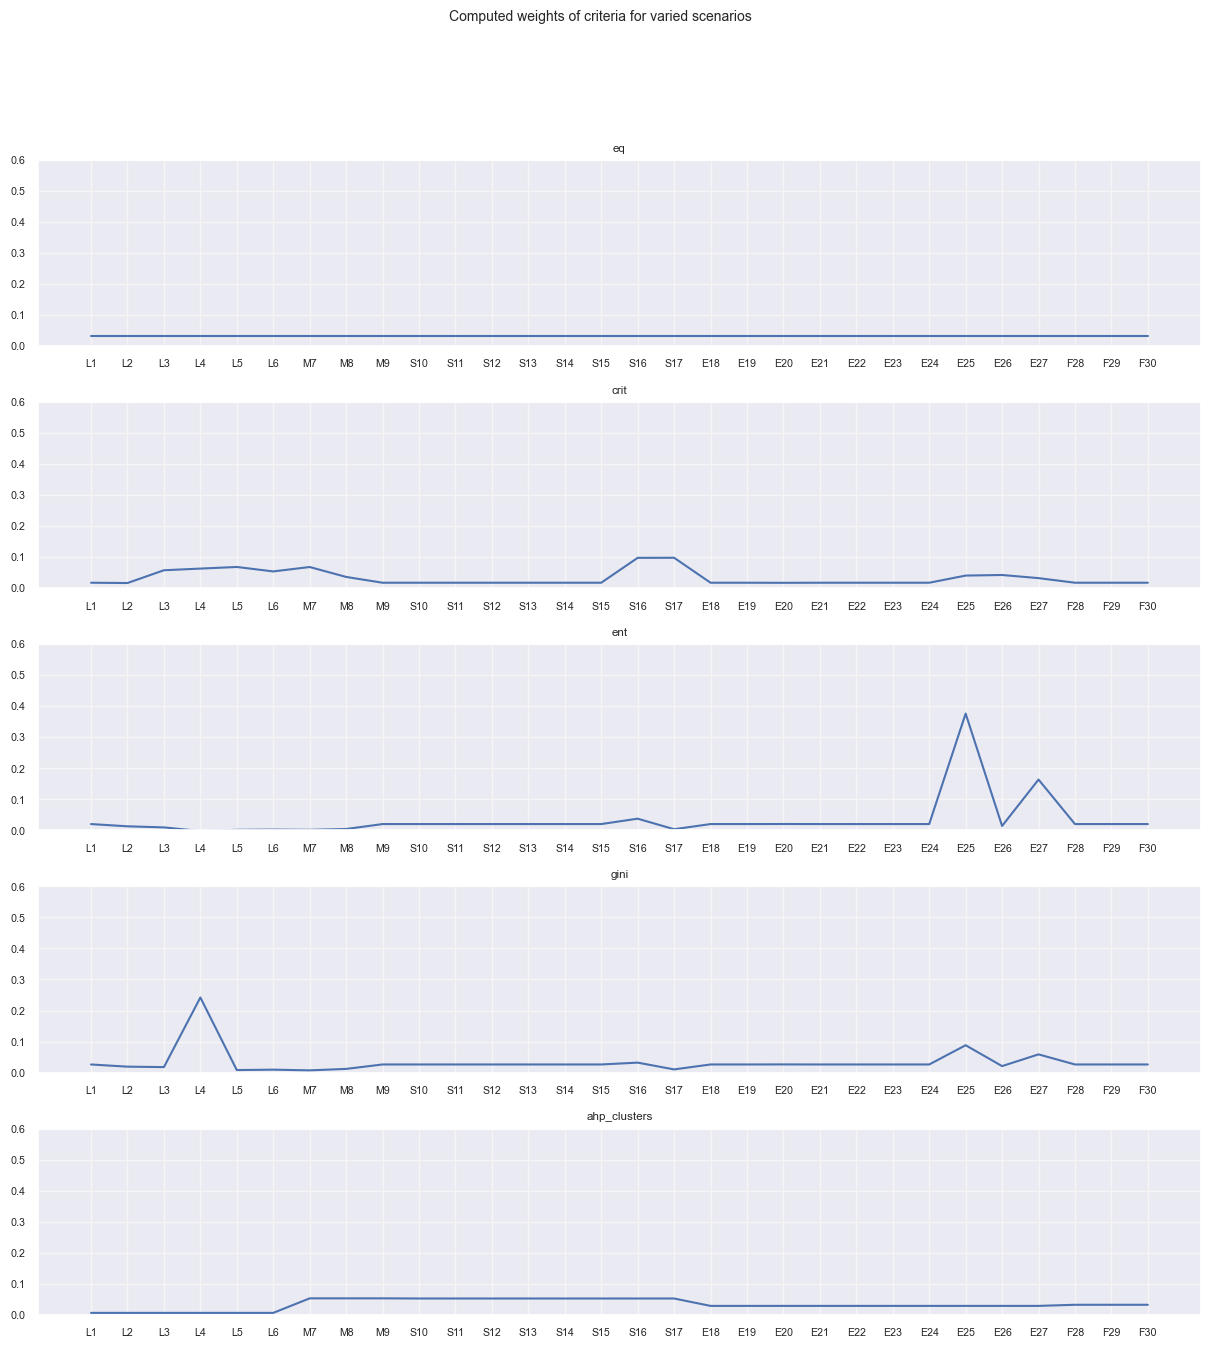

In [23]:
experiment.draw_ahp_weights_plots()

Again, the VIKOR method was used to evaluate each alternative. A value of `v=0.5` was used to ascertain comparability with the benchmark rankings. The results are presented in table **TUTAJ** and on chart on Fig **TUTAJ**:

In [24]:
tempdf = experiment.comparison_ahp.to_dataframe()
tempdf[tempdf['weights_set'] == 'ahp_clusters']

,decision_problem,weights_set,evaluator,A1,A2,A3,A4,A5,A6,A7
4,wfarms,ahp_clusters,v=0.5,0.753345,0.197229,0.5,0.622675,0.86539,0.544407,1.0


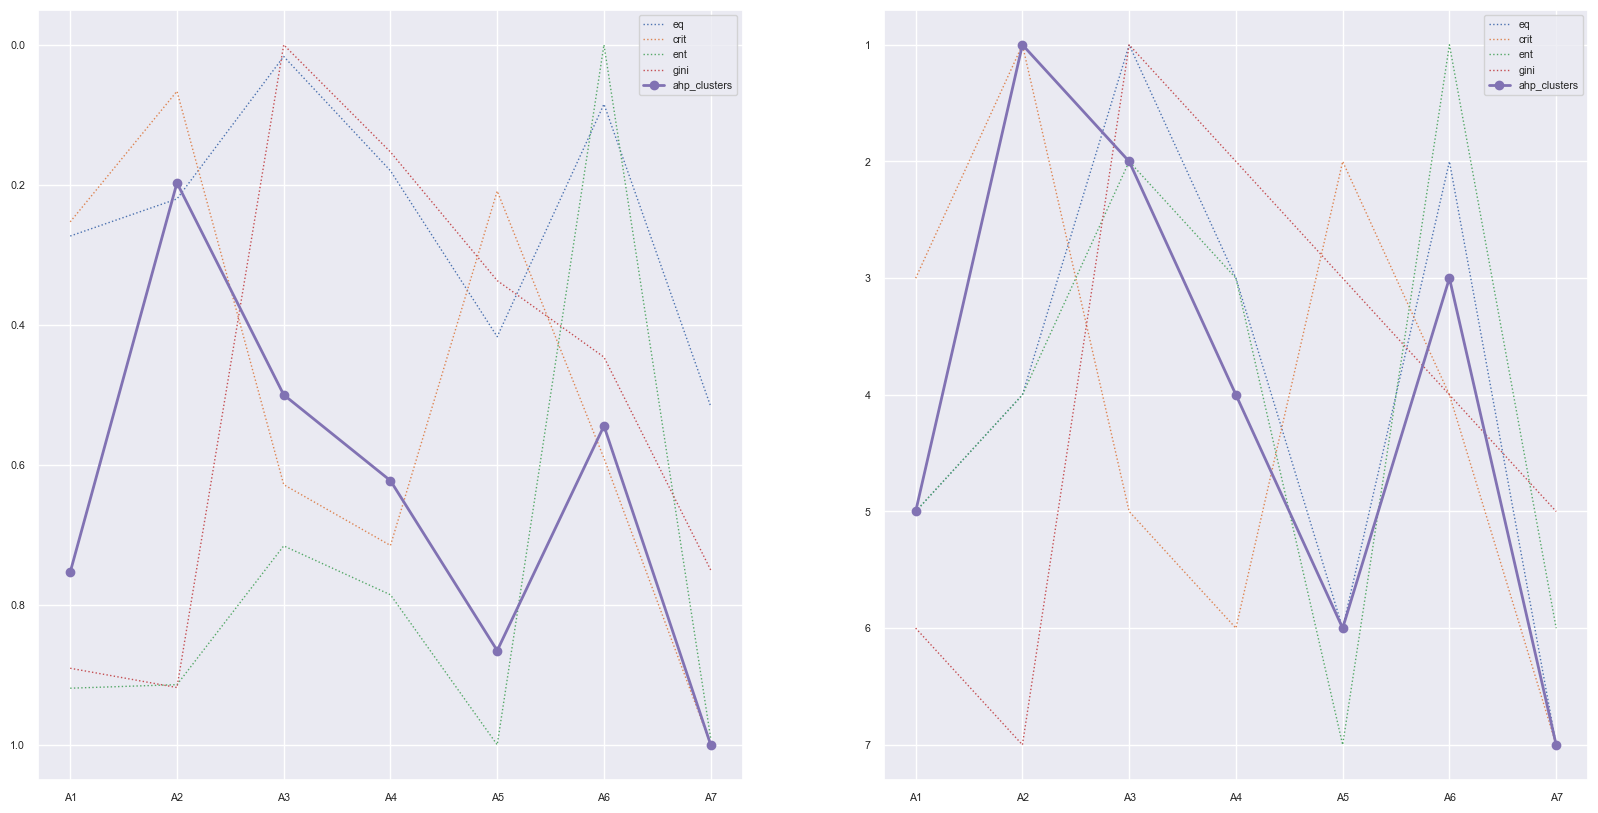

In [25]:
experiment.draw_ahp_results()

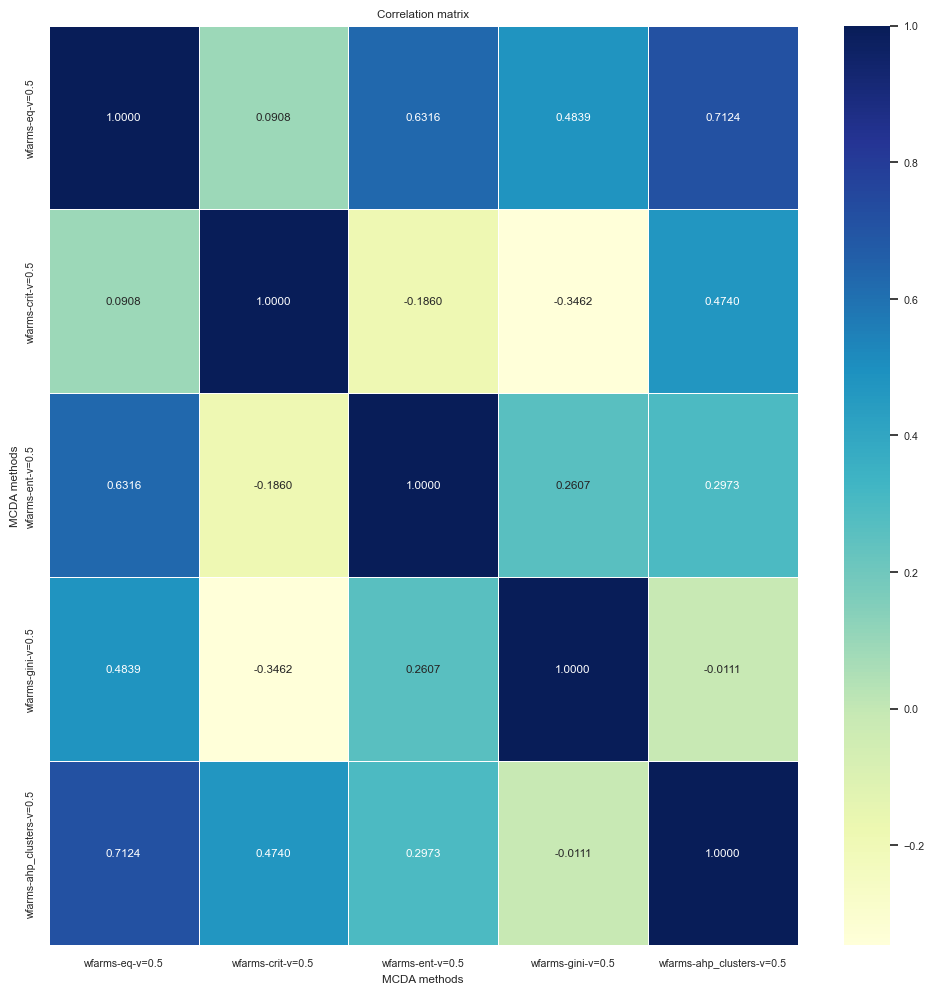

In [26]:
experiment.heatmap_ahp_correlations()

Based on the correlation matrix from **TABLE**, the results of the AHP-clusters scenario studied in this experiment are most similar to the ones obtained with the use of equal weights' scenario. This is understandable, as although individual clusters' importance was evaluated using expert judgment, the split of the weights within each cluster remained equal. Thisis visible on charts **TUTAJ**, where the EQ weights are very similar to AHP weights. When one studies the charts further, they can observe that another similar weights are for the CRIT method. And indeed, the correlation between AHP and CRIT rankings is 0.4740, which can be considered still significantly correlated.

If exclusively the winning alternative is considered in all rankings, the AHP scenario favors alternative A2, the same one that the CRIT scenario, whereas EQ and GINI scenarios favor alternative A3 and ENT scenario favors alternative A6.

### Criteria Elimination Robustness

As it was indicated in **Section ..**, the S16, S17, F28, F29 and F30 criteria were conflicting with the remaining criteria. Therefore, in a subsequent experiment, these criteria were eliminated, and another rankings were computed, for such updated decision matrices. The results are presented in on charts on Fig. **TUTAJ**.

<Figure size 640x480 with 0 Axes>

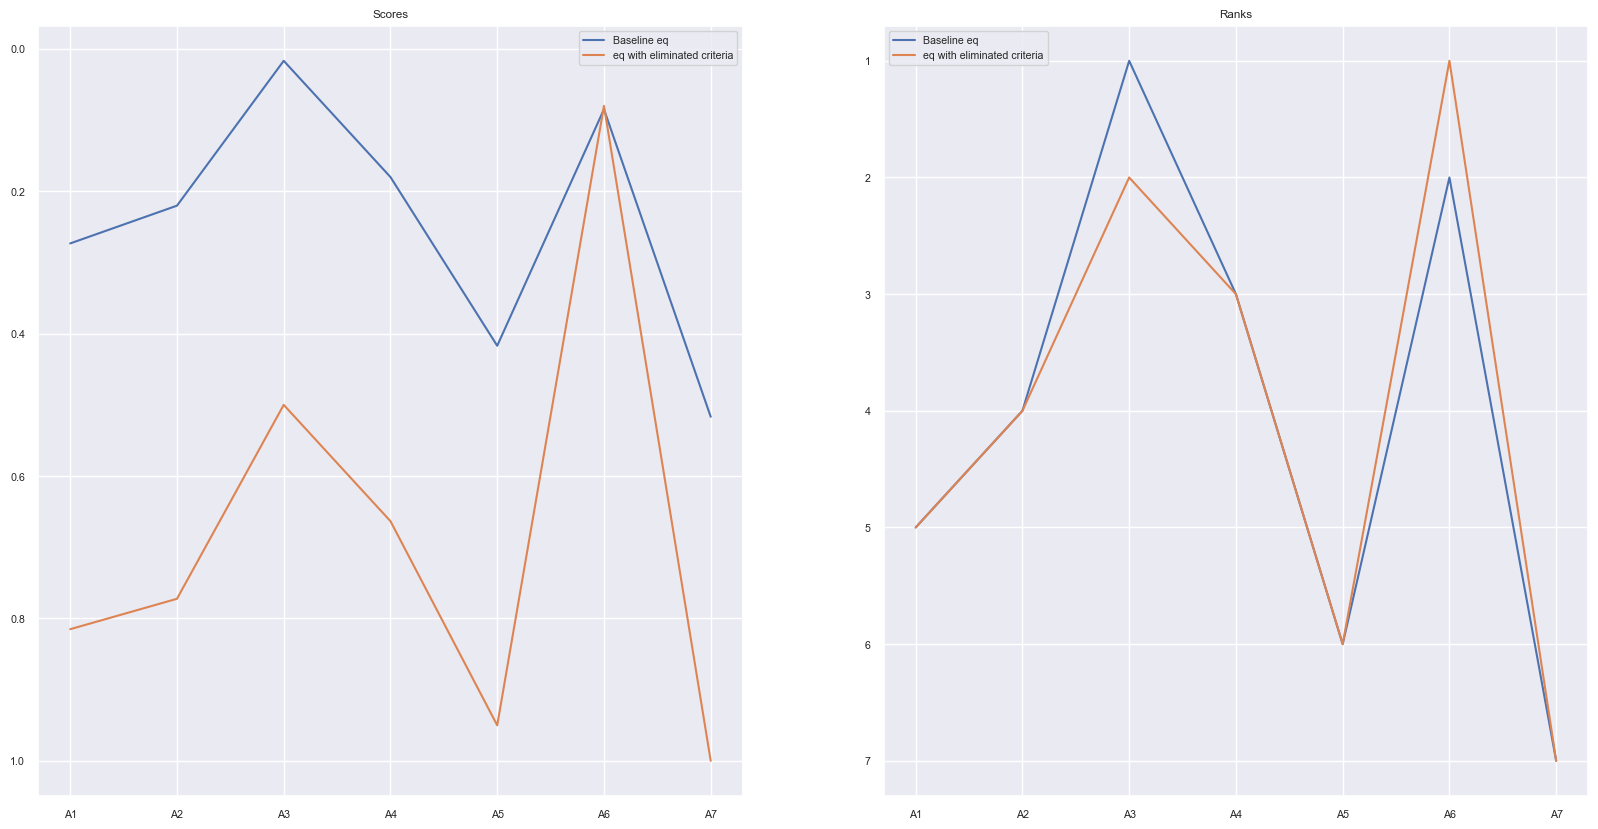

<Figure size 640x480 with 0 Axes>

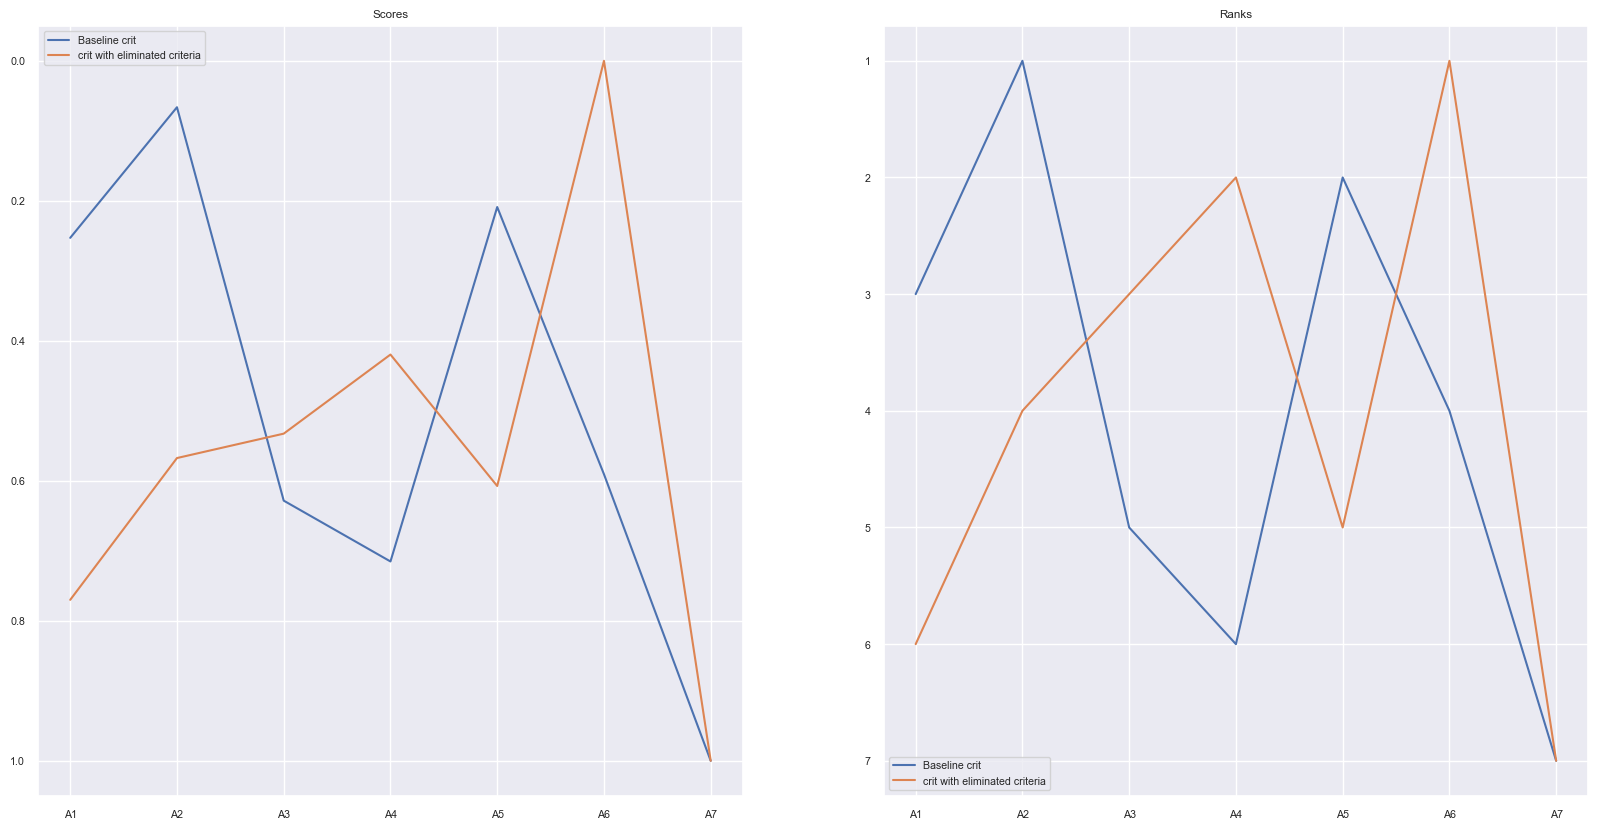

<Figure size 640x480 with 0 Axes>

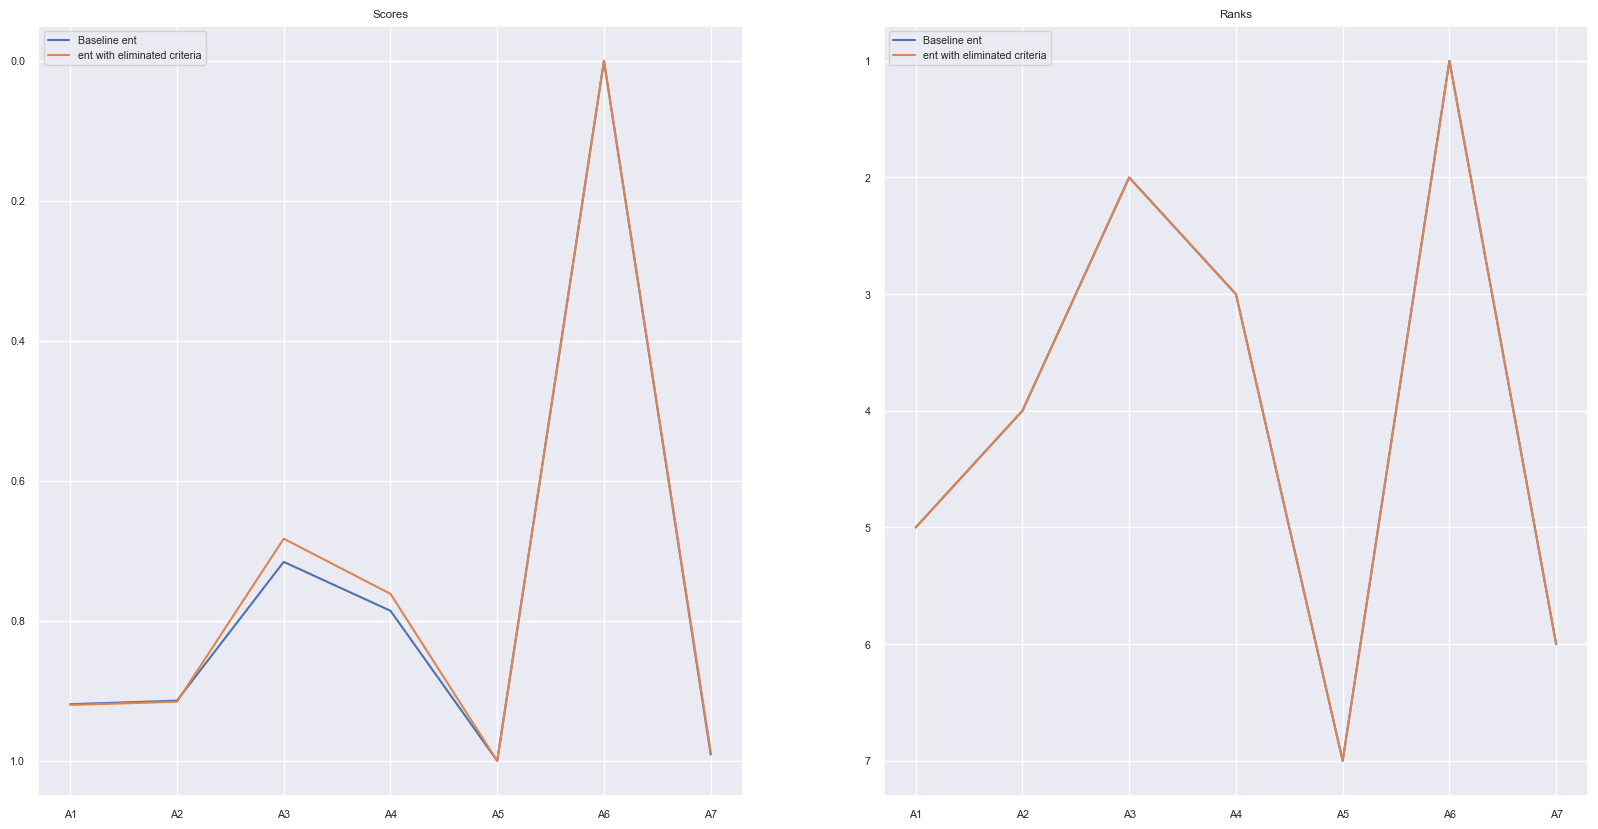

<Figure size 640x480 with 0 Axes>

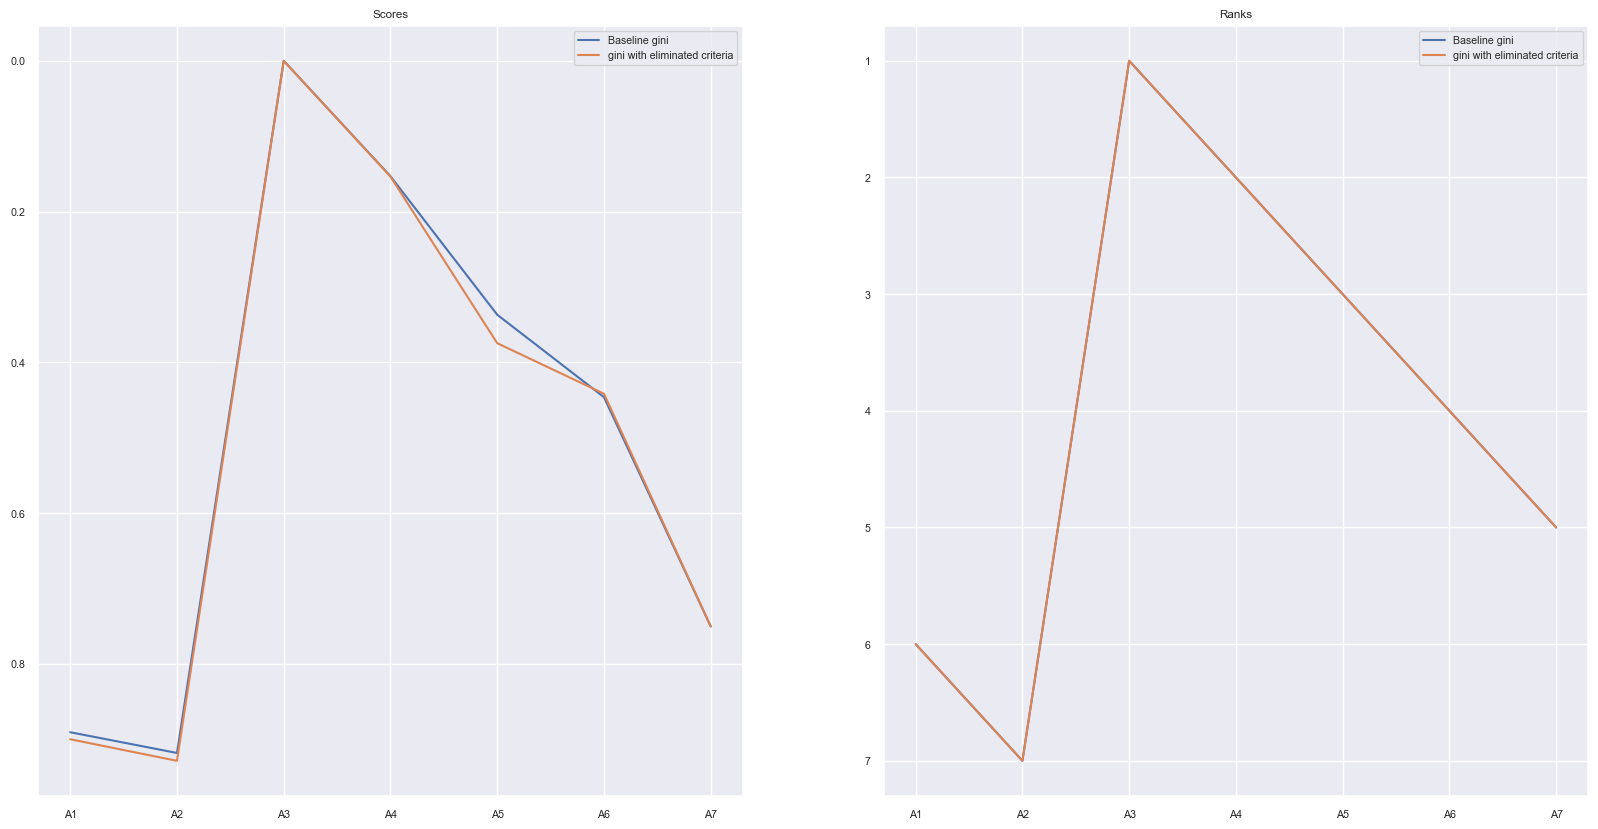

<Figure size 640x480 with 0 Axes>

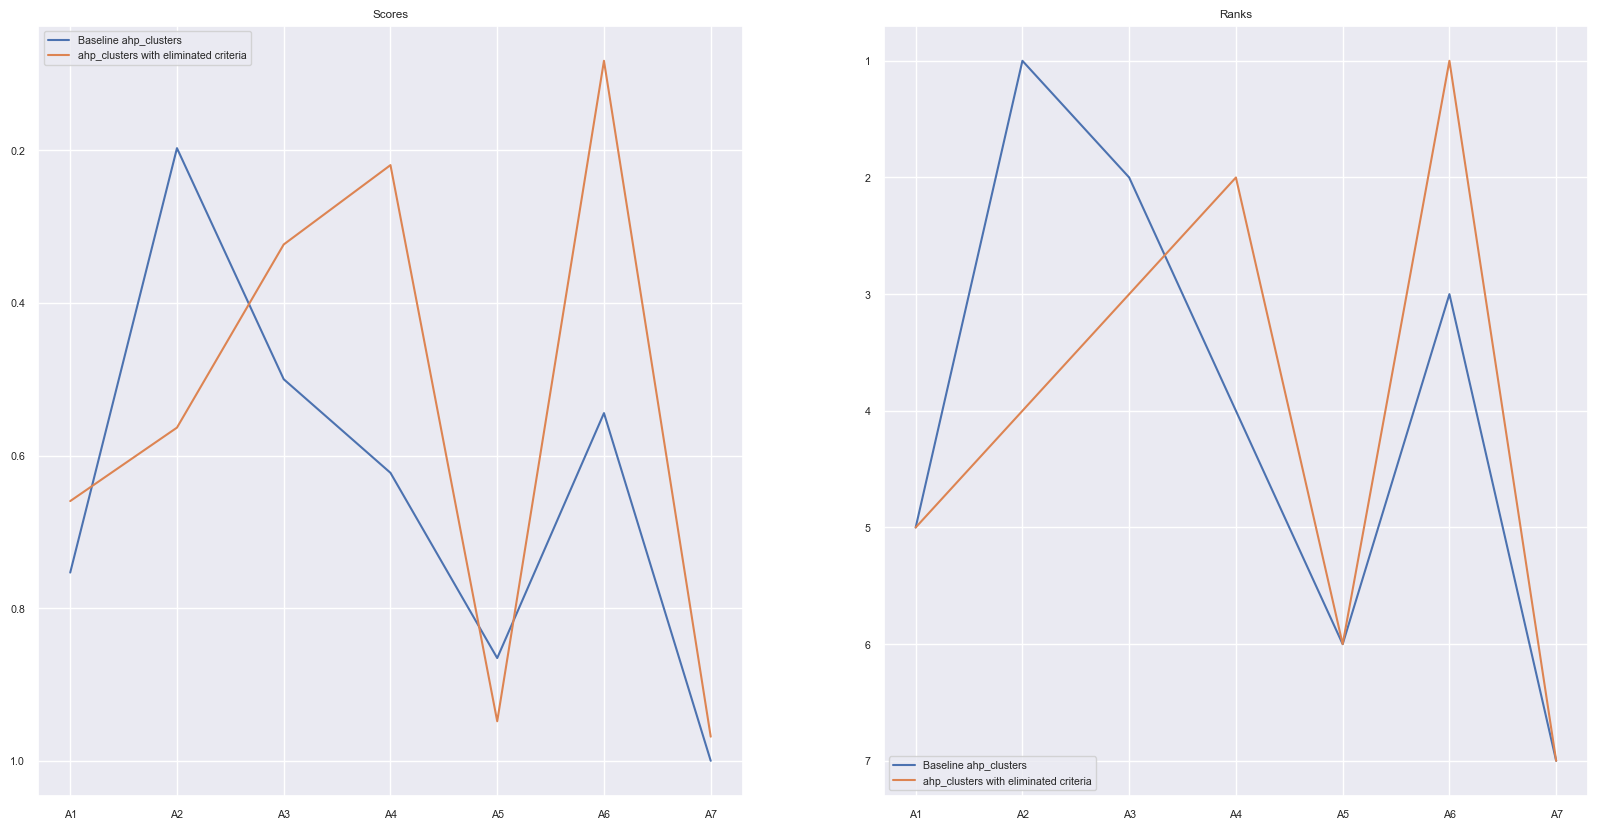

In [27]:
for scenario in ['eq', 'crit', 'ent', 'gini', 'ahp_clusters']:
    experiment.draw_elimination_results_comparison(scenario)
    plt.show()


For the ENT weights,there is no change between rankings, and only slight difference in scores for alternatives A3 and A4 (**dlaczego? co takiego ma entropy?**). Similarly for GINI - no change in ranks, and only slight change in scores for A5 and A6.

For the EQ weights, elimination of 5 criteria affected the ranking only slightly - alternative A6 became ranked first, after previously being ranked second. However, when the scores are studied, it can be observed that A6's score did not change, whilst the scores of the rest of the alternatives became significantly higher (worse).

Elimination of the 5 criteria resulted in massive changes for the CRIT weights. Note, that all weights were recomputed after the elimination of those 5 criteria, and evidently for CRIT method that produced completely different output. The winning alternative is now A6, same as for all but the GINI weights.

Finally, for the AHP_CLUSTERS weights, most significant changes in scores can be observed for alternatives A2, A4, A6 and result in A6 winning (previously ranked 3rd).



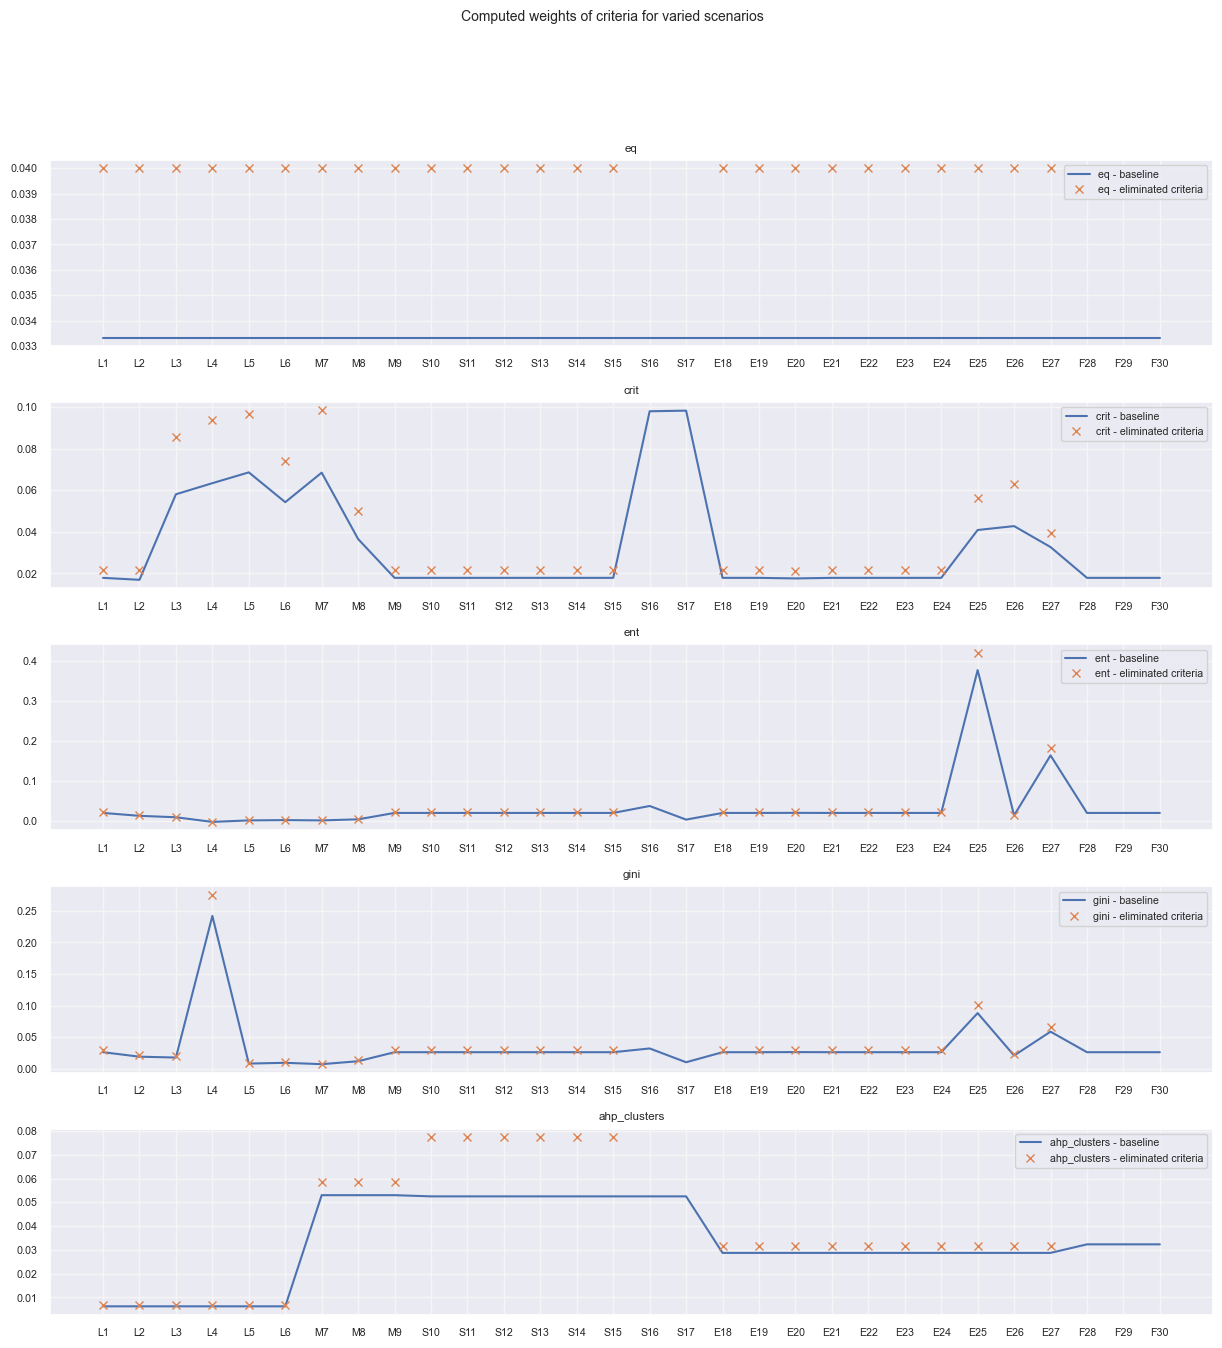

In [28]:
experiment.draw_ahp_and_elim_weights_plots()
plt.show()

The changes in weighs are presented **TUTAJ**.

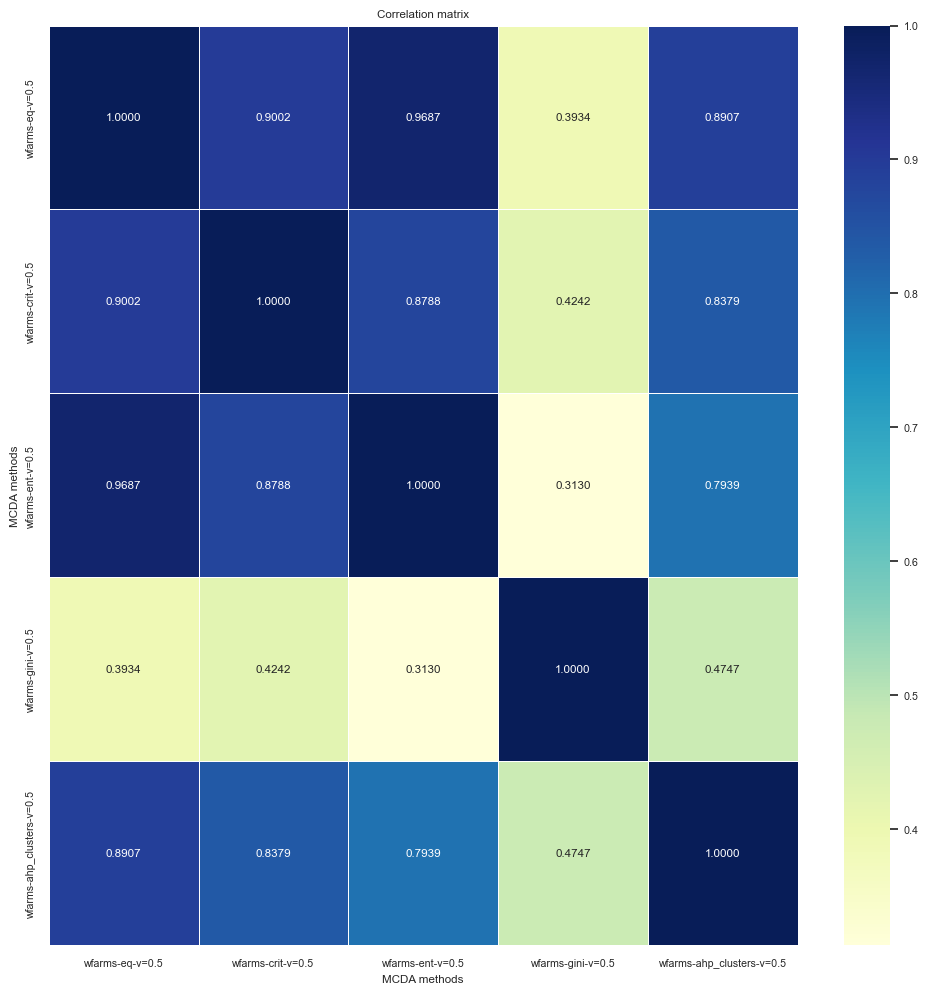

In [29]:
experiment.heatmap_elimination_correlations(path='var/elimination_correlation.png')
plt.show()

The observations presented above are also confirmed in the correlation matrix between all weighting methods for the elimination scenario. It can be observed, that all scores are highly correlated, and only for GINI its correlation to other weighting method is 0.3130-0.4747.